#

# How to Launch a Successful Beer?

### Group: pada-wan

## Table of Contents

1. [Info about Datasets](#info-about-datasets)
   - [beers.csv](#01-beerscsv)
   - [breweries.csv](#02-breweriescsv)
   - [reviews.csv](#03-reviewscsv)
   - [ratings.csv](#04-ratingscsv)
   - [users.csv](#05-userscsv)

2. [Summary of Ratings](#summary-of-ratings)
   - [Dataset: BeerAdvocate](#dataset-beeradvocate)
   - [Dataset: RateBeer](#dataset-ratebeer)
   - [Dataset: Matched Beer Data](#dataset-matched-beer-data)

3. [Part 0: Initialization](#part-0-initialization)
   - [a) Import libraries and functions](#a-import-libraries-and-functions)
   - [b) Dataset initialization and loading into a pandas DataFrame](#b-dataset-initialization-and-loading-into-a-pandas-dataframe)
     - [Extracting and loading rb, ba, and matched datasets](#extracting-and-loading-rb-ba-and-matched-datasets)
     - [Loading rb and ba datasets rating category into a dataframe](#loading-rb-and-ba-datasets-rating-category-into-a-dataframe)
   - [Additional datasets added](#additional-datasets-added)
     - [Beerizer dataset](#beerizer-dataset)
     - [Wikipedia datasets](#wikipedia-datasets)
     - [Luxembourg Income Study dataset](#luxembourg-income-study-dataset)

4. [Part 1: Preprocessing](#part-1-preprocessing)
   - [a) Beerizer dataset preprocessing](#a-beerizer-dataset-preprocessing)
   - [b) Wikipedia dataset preprocessing](#b-wikipedia-dataset-preprocessing)
   - [c) Inspection and preprocessing of rb and ba datasets](#c-inspection-and-preprocessing-of-rb-and-ba-datasets)
     - [Most reviewed beer](#most-reviewed-beer)
     - [Most reviewed brewery](#most-reviewed-brewery)
     - [Remove bots/fake accounts](#remove-botsfake-accounts)
   - [d) Match Beerizer with matched datasets](#d-match-beerizer-with-matched-datasets)
   - [e) Preprocessing income dataset](#e-preprocessing-income-dataset)

5. [Part 2: Newcomers Analysis](#part-2-newcomers-analysis)

6. [Part 3: Customer Identity and Origin Analysis](#part-3-customer-identity-and-origin-analysis)
   - [Add brewery info to "country_analysis2" dataset](#add-brewery-info-to-country_analysis2-dataset)
   - [Ideal country for launching a beer](#ideal-country-for-launching-a-beer)
   - [Market saturation analysis](#market-saturation-analysis)

7. [Part 4: Market Analysis](#part-4-market-analysis)
   - [Customer habits](#customer-habits)
   - [Beer type analysis and choice](#beer-type-analysis-and-choice)
   - [Price and ratings by origin and type](#price-and-ratings-by-origin-and-type)
   - [Income normalization](#income-normalization)

8. [Part 5: Time Analysis](#part-5-time-analysis)

9. [Market Analysis](#market-analysis)

## Info about our main Datasets : beer advocate and ratebeers
### different subparts of rb and ba dataset explained
- beers.csv
Contains information about the beers, such as the name, style, and brewery.
- breweries.csv
Contains information about the breweries, such as the name and location.
- reviews.csv
Contains information about the reviews, such as the beer ID, user ID, and rating.
- ratings.csv
Contains information about the ratings, such as the beer ID, user ID, and rating.
- users.csv
Contains information about the users, such as the username and age.
---
### Category of dataset explained

#### Dataset: BeerAdvocate

- **ba_abv**: 4.8 - Percentage alcohol
- **ba_avg**: 3.45 - Average rating (out of 5) of the beer
- **ba_avg_computed**: 3.439867 - Computed average rating (out of 5) of the beer
- **ba_avg_matched_valid_ratings**: 3.504068
- **ba_ba_score**: 80.0 - BA Score is the beer's overall score (out of 100) based on its ranking within its style category, based on a custom Bayesian algorithm
- **ba_beer_id**: 19827 - Unique ID for the beer
- **ba_beer_name**: Legbiter - Name of the beer
- **ba_beer_wout_brewery_name**: Legbiter - Name of the beer without the brewery name
- **ba_brewery_id**: 10093 - Unique ID for the brewery
- **ba_brewery_name**: Strangford Lough Brewing Company Ltd - Name of the brewery
- **ba_bros_score**: 80.0 - The Bros Score is the average score given by the two brothers who founded BeerAdvocate
- **ba_nbr_matched_valid_ratings**: 59
- **ba_nbr_ratings**: 75 - The number of ratings for the beer
- **ba_nbr_reviews**: 59 - The number of reviews for the beer
- **ba_style**: English Pale Ale - The style of the beer
- **ba_zscore**: -0.649167 - Indicates how many standard deviations a data point is from the mean of the dataset.

#### Dataset: RateBeer

- **rb_abv**: 4.8 - Percentage alcohol
- **rb_avg**: 2.79
- **rb_avg_computed**: 2.923596
- **rb_avg_matched_valid_ratings**: 2.923596
- **rb_beer_id**: 37923 - Unique ID for the beer
- **rb_beer_name**: Strangford Lough Legbiter - Name of the beer
- **rb_beer_wout_brewery_name**: Legbiter - Name of the beer without the brewery name
- **rb_brewery_id**: 4959 - Unique ID for the brewery
- **rb_brewery_name**: Strangford Lough - Name of the brewery
- **rb_nbr_matched_valid_ratings**: 89
- **rb_nbr_ratings**: 89 - The number of reviews for the beer
- **rb_overall_score**: 23.0 - The overall rating (out of 100)
- **rb_style**: Golden Ale/Blond Ale - The style of the beer
- **rb_style_score**: 27.0 - The rating in this style category (out of 100)
- **rb_zscore**: -0.698304 - Indicates how many standard deviations a data point is from the mean of the dataset.

#### Dataset: Matched Beer Data

- **scores_diff**: 1.0
- **scores_sim**: 1.0

## Part 0 a): Import librairies and functions 

In [ ]:
#libraries :
import os
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display

#functions :
from src.scripts.exporter_csv_correct_format import export_csv_correct_format as csv_exporter
from src.scripts.load_some_dataset_and_save_it_in_data_directory import extract_full_data as load_txt_data

## Part 0 b) : Dataset initialization and loading into a pandas DataFrame 

#### extracting and loading rb, ba and matched datasets

In [60]:
# Define the list of filenames to be extracted
filenames = ["matched_beer_data.tar.gz", "BeerAdvocate.tar.gz", "RateBeer.tar.gz"]
base_directory = "src/data"

# Loop through each filename in the list
# for fname in filenames:
#     # Create the extraction folder named data_{base_name}
#     base_name = os.path.splitext(os.path.splitext(fname)[0])[0]  # Remove both .tar and .gz
#     extract_folder = os.path.join(base_directory, f"data_{base_name}")
    
#     # Create the folder if it does not exist
#     os.makedirs(extract_folder, exist_ok=True)
    
#     # Check the file extension and open the tar file accordingly
#     if fname.endswith("tar.gz"):
#         with tarfile.open(fname, "r:gz") as tar:
#             tar.extractall(path=extract_folder)  
#             print(f"Extracted all contents from {fname} to {extract_folder}")
#     elif fname.endswith("tar"):
#         with tarfile.open(fname, "r:") as tar:
#             tar.extractall(path=extract_folder)
#             print(f"Extracted all contents from {fname} to {extract_folder}")
#     else:
#         print(f"The file {fname} is not a recognized .tar.gz or .tar file.")


#3_ open data in pandas dataframe : 
    #3.1
ba_beers = pd.read_csv("src/data/data_BeerAdvocate/beers.csv")
ba_breweries = pd.read_csv("src/data/data_BeerAdvocate/breweries.csv")
ba_users = pd.read_csv("src/data/data_BeerAdvocate/users.csv")
ba_ratings = pd.read_csv("src/data/data_BeerAdvocate/ratings.csv")
ba_reviews = pd.read_csv("src/data/data_BeerAdvocate/reviews.csv")

    #3.2
rb_beers = pd.read_csv("src/data/data_RateBeer/beers.csv")
rb_breweries = pd.read_csv("src/data/data_RateBeer/breweries.csv")
rb_users = pd.read_csv("src/data/data_RateBeer/users.csv")
rb_ratings = pd.read_csv("src/data/data_RateBeer/ratings.csv")
rb_reviews = pd.read_csv("src/data/data_RateBeer/reviews.csv")

    #3.3 : we will mostly use this files, since they have fusionned the data from the ratebeer and beeradvocate datasets
matched_beers = pd.read_csv("src/data/data_matched_beer_data/beers.csv", header=[0, 1])
matched_breweries = pd.read_csv("src/data/data_matched_beer_data/breweries.csv", header=[0, 1])
matched_ratings = pd.read_csv("src/data/data_matched_beer_data/ratings.csv", header=[0, 1])
matched_users_approx = pd.read_csv("src/data/data_matched_beer_data/users_approx.csv", header=[0, 1])
matched_users = pd.read_csv("src/data/data_matched_beer_data/users.csv", header=[0, 1])

    #3.3.1 : flatten the columns for easier access
matched_beers.columns = ['_'.join(col).strip() for col in matched_beers.columns.values]
matched_breweries.columns = ['_'.join(col).strip() for col in matched_breweries.columns.values]
matched_ratings.columns = ['_'.join(col).strip() for col in matched_ratings.columns.values]
matched_users_approx.columns = ['_'.join(map(str, col)).strip() for col in matched_users_approx.columns.values]
matched_users.columns = ['_'.join(col).strip() for col in matched_users.columns.values]

#### loading of rb and ba datasets rating category into a dataframe
Script to transform .txt data into .csv data for ease of use (takes time)

In [61]:
# #convert txt to csv by keeping only the columns we need
# # Define file paths and column names
# input_file_path = 'src/data/data_BeerAdvocate/ratings.txt'
# output_file_path = 'src/data/data_BeerAdvocate/ratings.csv'
# columns = [
#     'beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv', 'date',
#     'user_name', 'user_id', 'appearance', 'aroma', 'palate', 'taste', 
#     'overall', 'rating'
# ]  # we exclude "text" and "review" 

# def parse_entry(lines):
#     entry = {}
#     for line in lines:
#         if ': ' in line:
#             key, value = line.split(': ', 1)
#             if key not in ['text', 'review']: 
#                 entry[key] = value.strip()
#     return entry

# data = []
# entry_lines = []

# with open(input_file_path, 'r', encoding='utf-8') as file:
#     for line in file:
#         if line.strip():  
#             entry_lines.append(line.strip())
#         else:
#             if entry_lines:  
#                 data.append(parse_entry(entry_lines))
#                 entry_lines = []

#     if entry_lines:
#         data.append(parse_entry(entry_lines))


# df = pd.DataFrame(data, columns=columns)
# df.to_csv(output_file_path, index=False, encoding='utf-8')

# print(f"Data saved to {output_file_path}")

### Additional datasets added 

#### Addition of Beerizer dataset

We used data scraped from Beerizer, a website selling many beers, which therefore displays comparable prices.

In [62]:
df_beerizer = pd.read_csv('./src/data/data_beerizer/official_beerizer_dataset.csv')
print(df_beerizer.head())
print(f"Initial shape of the dataset: {df_beerizer.shape}")

                    Beer_name    Price       Origin Rating  \
0                        Glas   € 5,50      England   3.83   
1            Meesterstuk 2025  € 13,99  Netherlands   4.11   
2            Meesterstuk 2025   € 6,99  Netherlands   4.11   
3  Do Not Eat the Yellow Snow   € 5,59  Netherlands   3.66   
4           Liqour 43 Infused   € 3,79  Netherlands      ?   

                  Brewery Percentage                      Beer_type  \
0   Azvex Brewing Company       5.2%  Pale Ale - New England / Hazy   
1                   Jopen     11.11%                 Stout - Pastry   
2                   Jopen     11.11%                 Stout - Pastry   
3  Uiltje Brewing Company       8.9%        IPA - Imperial / Double   
4   Guilty Monkey Brewery       7.6%              Belgian Quadrupel   

    Countenance Countenance_per_litre  
0           NaN                   NaN  
1  Bottle 750ml     € 18,65 per litre  
2  Bottle 750ml     € 18,65 per litre  
3  Bottle 750ml     € 18,65 per litre  


#### Addition of wikipedia dataset

##### 1st wikipedia dataset : Beer consumption per country

In [63]:
beer_consumption_country_wikipedia = pd.read_csv("src/data/Data_consumption_per_country/List_of_countries_by_beer_consumption_per_capita_1.csv")
print(beer_consumption_country_wikipedia.head())
print(f"Initial shape of the dataset: {beer_consumption_country_wikipedia.shape}")

            Country  Consumption\nper capita\n(litres per year)  \
0  Czech Republic *                                       128.0   
1         Austria *                                       107.8   
2         Romania *                                       100.3   
3         Germany *                                        99.0   
4          Poland *                                        97.7   

   2018\nchange\n(litres per year)  \
0                              NaN   
1                              0.2   
2                              1.4   
3                             -2.1   
4                             -0.5   

  Total national\nconsumption\n(million litres\nper year)  Year  Sources  
0                                              1,520       2023      NaN  
1                                                949       2019      NaN  
2                                              1,956       2019      NaN  
3                                              8,160       2019     

#### 2nd wikipedia dataset : countries number of inhabitants (to better normalize data)

In [64]:
#Now we will add the information about the population to the country_info dataframe 
countries_population = pd.read_csv("src/data/Data_Countries_population/countries_population.csv") #taken from world bank group
countries_population2010 = countries_population[['Country Name', '2010']] #since the data represents the ratings from 2001 to 2017, we will use the 2010 year as a reference.
print(countries_population2010.head())
print(f"Initial shape of the dataset: {countries_population2010.shape}")

                  Country Name         2010
0                        Aruba     100341.0
1  Africa Eastern and Southern  523459657.0
2                  Afghanistan   28189672.0
3   Africa Western and Central  356337762.0
4                       Angola   23364185.0
Initial shape of the dataset: (266, 2)


#### Addition of "our world in Data" Dataset ( from Luxenbourg Income Study) : median income per year after- tax 

In [111]:
df_median_income = pd.read_csv("src/data/median-income-per-year-after-tax/median-income-per-year-after-tax.csv") 
print(df_median_income.head())
print(f"Initial shape of the dataset: {df_median_income.shape}")

     Country  Year  Median income (after tax)
0  Australia  1981                   11524.56
1  Australia  1985                   11697.10
2  Australia  1989                   12009.50
3  Australia  1995                   10997.42
4  Australia  2001                   12507.63
Initial shape of the dataset: (881, 3)


## Part 1 Preprocessing

### Part 1 a) Dataset preprocessing of the Beerizer dataset

After a first look, the retrieved data is not perfect and need some preprocessing.

- Basic preprocessing
- convert numbers values to float
- create volume column
- recalculate price per litter

In [65]:
#drop rows with missing values
df_beerizer = df_beerizer.dropna()
print(f"Number of entries after removing lines with missing values: {len(df_beerizer)}")
#remove duplicates
df_beerizer = df_beerizer.drop_duplicates(keep='first')
print(f"Number of entries after removing duplicates: {len(df_beerizer)}")

Number of entries after removing lines with missing values: 28973
Number of entries after removing duplicates: 28547


In [66]:
#correct price column
#remove € sign and convert to float
df_beerizer['Price'] = df_beerizer['Price'].str.replace('€', '', regex=False)
df_beerizer['Price'] = df_beerizer['Price'].str.replace('.', '', regex=False)
df_beerizer['Price'] = df_beerizer['Price'].str.replace(',', '.', regex=False)
df_beerizer['Price'] = df_beerizer['Price'].astype(float)
df_beerizer = df_beerizer.rename(columns={'Price': 'Price_euro'}) #rename column to have a more explicit name

print(f"Mean price of a beer: {df_beerizer['Price_euro'].mean():.2f}€\nMedian price of a beer: {df_beerizer['Price_euro'].median():.2f}€")

df_beerizer = df_beerizer.sort_index() 

Mean price of a beer: 14.01€
Median price of a beer: 7.10€


The mean price seems high. After exploring the data, it comes from some very expensive outliers that we will remove after as our goal is not to launch a luxury brand.

In [67]:
#convert Percentage column to float
df_beerizer['Percentage'] = df_beerizer['Percentage'].str.replace('%', '', regex=False)
df_beerizer['Percentage'] = df_beerizer['Percentage'].astype(float)
#convert Rating column
df_beerizer['Rating'] = pd.to_numeric(df_beerizer['Rating'], errors='coerce')

df_beerizer['Countenance'].unique()

array(['Bottle 750ml', '330ml', 'Bottle 330ml', '10000ml', 'Can 440ml',
       '20000ml', 'Bottle 375ml', '12000ml', 'Bottle 500ml', '30000ml',
       '500ml', 'Can 500ml', 'Can 330ml', 'Can 470ml', '355ml', '473ml',
       '605ml', 'Bottle 341ml', 'Bottle 650ml', 'Bottle 250ml', '200ml',
       '6000ml', 'Bottle 1500ml', 'Can 473ml', 'Bottle 475ml', '5000ml',
       '10-pack', 'Bottle 370ml', '300ml', 'Bottle 568ml', '12-pack',
       '4-pack', '7-pack', 'Bottle 473ml', '20-pack', '6-pack', '24-pack',
       '700ml', 'Can 355ml', '578ml', '568ml', '350ml', 'Can 400ml',
       '8000ml', '3000ml', 'Bottle 550ml', 'Bottle 355ml', '85-pack',
       '255-pack', '550ml', '3100ml', '48-pack', '5-pack', '9-pack',
       '1125ml', '2970ml', '335ml', '248ml', 'Can 250ml', 'Can 568ml',
       'Can 375ml', 'Bottle 300ml', '4130ml', '4490ml', '475ml', '460ml',
       'Can 236ml', 'Bottle 660ml', '4730ml', '660ml', '400ml', '275ml',
       'Can 475ml', '187ml', '3-pack', '560ml', '2018ml', '40ml',


Multiple countenances are displayed, most of which specify volume in milliliters. However, some are listed as n-packs. After reviewing the website, it is evident that these beers are available in various countenances. Therefore, dropping them helps to eliminate redundant information. We also recalculate the price per litter as it is wrong in some cases.

In [68]:
#add volume column
df_beerizer['Volume_ml'] = df_beerizer['Countenance'].copy()
df_beerizer['Volume_ml'] = df_beerizer['Volume_ml'].str.replace('ml', '').str.replace('Can ', '').str.replace('Bottle ', '')
#remove lines with non numeric values, removes n-pack values
df_beerizer = df_beerizer[df_beerizer['Volume_ml'].str.isnumeric()]
df_beerizer['Volume_ml'] = df_beerizer['Volume_ml'].astype(int)
#creates a new column with price per litter
df_beerizer['Price_per_litter'] = round(df_beerizer['Price_euro'] / (df_beerizer['Volume_ml'] / 1000),2)
df_beerizer = df_beerizer.drop(columns=['Countenance_per_litre'])

In [69]:
#drop beers appearing more than once
df_beerizer = df_beerizer.sort_values('Price_per_litter')
df_beerizer = df_beerizer.drop_duplicates(subset=['Beer_name', 'Brewery', 'Origin', 'Beer_type', 'Percentage'], keep='first')
print(f"Number of entries: {len(df_beerizer)}")

Number of entries: 23440


In [70]:
#add a column with the general type of beer
df_beerizer['Beer_type_general'] = df_beerizer['Beer_type'].str.split(' - ').str[0]

#drop beers with price per litter higher than a given value to have a more realistic dataset for general beer
price_threshold = 25
df_beerizer = df_beerizer[df_beerizer['Price_per_litter'] < price_threshold]

print(f"Final number of entries after removing beers with price per litter higher than {price_threshold}€: {len(df_beerizer)}")

df_beerizer.to_csv('./data/cleaned_beerizer.csv', index=False)

Final number of entries after removing beers with price per litter higher than 25€: 16634


In the end, we have a cleaned dataset keeping only meaningfull information but still with enough data.

### Part 1 b) Datapreprocessing of wikipedia dataset : 

In [71]:
beer_consumption_country_wikipedia = beer_consumption_country_wikipedia.drop(columns=['2018\nchange\n(litres per year)', 'Year', 'Sources'])
beer_consumption_country_wikipedia['Country'] = beer_consumption_country_wikipedia['Country'].str.replace(' *', '', regex=False)
beer_consumption_country_wikipedia.rename(
    columns={'Consumption\nper capita\n(litres per year)': 'consumption_per_inhabitant_L_per_year_wikipedia'}, 
    inplace=True)
beer_consumption_country_wikipedia.rename(
    columns={'Total national\nconsumption\n(million litres\nper year)': 'consumption_per_country_millionL_per_year_wikipedia'}, 
    inplace=True)
beer_consumption_country_wikipedia['consumption_per_country_millionL_per_year_wikipedia'] = beer_consumption_country_wikipedia['consumption_per_country_millionL_per_year_wikipedia'].str.replace(',', '', regex=False).astype(float)

### Part 1 c) Inspection of the rb and ba datasets and preprocessing : 

#### Part 1 c) 1. Inspection : Most reviewed beer

In [72]:
#1. Most reviewed beers and average grade : 
matched_beers['rb_and_ba_total_nbr_ratings'] = matched_beers['rb_nbr_ratings'] + matched_beers['ba_nbr_ratings']
matched_beers['rb_and_ba_total_ratings'] = (matched_beers['rb_avg_computed']*matched_beers['rb_nbr_ratings'] + matched_beers['ba_avg_computed']*matched_beers['ba_nbr_ratings'])/matched_beers['rb_and_ba_total_nbr_ratings']


# Merge to add 'country' column to matched_beers
matched_beers = pd.merge(
    matched_beers,matched_breweries[['rb_id', 'rb_location']],
    left_on=['rb_brewery_id'],   # Columns in matched_beers
    right_on=['rb_id'],  # Columns in matched_breweries
    how="left"
)

top_beers = matched_beers.sort_values(
        by=['rb_and_ba_total_nbr_ratings'],ascending=False
    ).head(5)

# Print all
i = 1
for _, row in top_beers[['ba_beer_name', 'ba_brewery_name', 'ba_style', 'rb_and_ba_total_nbr_ratings', 'rb_and_ba_total_ratings', 'rb_location']].iterrows():
    print(f"TOP {i} : The beer '\033[1m{row['ba_beer_name']}\033[0m', brewed by '\033[1m{row['ba_brewery_name']}\033[0m' from, \033[1m{row['rb_location']}\033[0m "
          f" is of style '\033[1m{row['ba_style']}\033[0m' and has been reviewed by '\033[1m{row['rb_and_ba_total_nbr_ratings']}\033[0m' persons with an average grade of '\033[1m{row['rb_and_ba_total_ratings']:.2f}\033[0m' .")
    i+=1

    

TOP 1 : The beer 'Trappistes Rochefort 10', brewed by 'Brasserie de Rochefort' from, Belgium  is of style 'Quadrupel (Quad)' and has been reviewed by '14500' persons with an average grade of '4.44' .
TOP 2 : The beer 'Brooklyn Black Chocolate Stout', brewed by 'Brooklyn Brewery' from, United States, New York  is of style 'Russian Imperial Stout' and has been reviewed by '10078' persons with an average grade of '4.10' .
TOP 3 : The beer 'AleSmith Speedway Stout', brewed by 'AleSmith Brewing Company' from, United States, California  is of style 'American Double / Imperial Stout' and has been reviewed by '9806' persons with an average grade of '4.36' .
TOP 4 : The beer 'Delirium Tremens', brewed by 'Brouwerij Huyghe' from, Belgium  is of style 'Belgian Strong Pale Ale' and has been reviewed by '9103' persons with an average grade of '3.95' .
TOP 5 : The beer 'Blind Pig IPA', brewed by 'Russian River Brewing Company' from, United States, California  is of style 'American IPA' and has been 

#### Part 1 c) 2. Inspection : Most reviewed brewery.

In [73]:
#Step 2 : Most reviewed breweries and average grade :

# Step 1: Calculate the weighted grades for each beer
matched_beers['ba_prod_grade_nbr'] = matched_beers['ba_avg_computed'] * matched_beers['ba_nbr_ratings']
matched_beers['rb_prod_grade_nbr'] = matched_beers['rb_avg_computed'] * matched_beers['rb_nbr_ratings']

# Step 2: Group by brewery to get total weighted grades and ratings counts
recap_breweries_info = (
    matched_beers
    .groupby('ba_brewery_id')[['ba_prod_grade_nbr', 'rb_prod_grade_nbr', 'ba_nbr_ratings', 'rb_nbr_ratings']]
    .sum()
    .reset_index()
)

# Step 3: Calculate the average grade for each brewery
recap_breweries_info['avg_grade'] = (
    (recap_breweries_info['ba_prod_grade_nbr'] + recap_breweries_info['rb_prod_grade_nbr']) / 
    (recap_breweries_info['ba_nbr_ratings'] + recap_breweries_info['rb_nbr_ratings'])
)

# Step 4: Calculate total ratings count per brewery
recap_breweries_info['total_nbr_ratings'] = recap_breweries_info['ba_nbr_ratings'] + recap_breweries_info['rb_nbr_ratings']

# Step 5: Select only the final columns and sort by total ratings
recap_breweries_info = (
    recap_breweries_info[['ba_brewery_id', 'avg_grade', 'total_nbr_ratings']]
    .sort_values(by='total_nbr_ratings', ascending=False)
)

# Step 6: Merge with brewery information to add name and location
recap_breweries_info = pd.merge(
    recap_breweries_info,
    matched_breweries[['ba_id', 'ba_name', 'ba_location']],
    left_on='ba_brewery_id',  
    right_on='ba_id',           
    how="left"
).drop(columns=['ba_id'])  # Drop the 'ba_id' column

# Print each brewery's information
i = 1
for _, row in recap_breweries_info[['ba_brewery_id', 'ba_name', 'ba_location', 'total_nbr_ratings', 'avg_grade']].iterrows():
    print(f"TOP {i}: The brewery '\033[1m{row['ba_name']}\033[0m' from '\033[1m{row['ba_location']}\033[0m' "
          f"has been reviewed by '\033[1m{row['total_nbr_ratings']}\033[0m' persons with an average grade of '\033[1m{row['avg_grade']:.2f}\033[0m'.")
    i += 1
    if i > 5: break

TOP 1: The brewery 'Brooklyn Brewery' from 'United States, New York' has been reviewed by '37242' persons with an average grade of '3.78'.
TOP 2: The brewery 'Russian River Brewing Company' from 'United States, California' has been reviewed by '31653' persons with an average grade of '4.18'.
TOP 3: The brewery 'Maine Beer Company' from 'United States, Maine' has been reviewed by '25561' persons with an average grade of '4.21'.
TOP 4: The brewery 'Weyerbacher Brewing Co.' from 'United States, Pennsylvania' has been reviewed by '24831' persons with an average grade of '3.66'.
TOP 5: The brewery 'Brouwerij Huyghe' from 'Belgium' has been reviewed by '22184' persons with an average grade of '3.73'.


In these first results, we can see a strong USA presence in the number of reviews for the beers and breweries, followed by Belgium. This leads us to wonder if there is an USA bias.

#### Part 1 c) 3. Remove bots/fake accounts

In [74]:
# Remove bots/fake accounts
original_nbr_users_ba= len(ba_users['user_id'].value_counts())
original_nbr_users_rb = len(rb_users['user_id'].value_counts())
ba_users = ba_users[ba_users['nbr_ratings']<= 1000]#discard probable bots/fake acoounts
rb_users = rb_users[rb_users['nbr_ratings']<= 1000]

    #count the number of "assumed fake accounts"
final_nbr_users_ba= len(ba_users['user_id'].value_counts())
final_nbr_users_rb = len(rb_users['user_id'].value_counts())
percentage_removed_ba = (original_nbr_users_ba-final_nbr_users_ba)/original_nbr_users_ba * 100
percentage_removed_rb = (original_nbr_users_rb-final_nbr_users_rb)/original_nbr_users_rb * 100
print(f"Percentage of users removed from ba_users is: {percentage_removed_ba:.2f}% and from rb_users is: {percentage_removed_rb:.2f}%")

Percentage of users removed from ba_users is: 1.05% and from rb_users is: 2.37%


#### Part 1 d) Match Beerizer with matched dataset from BeerAdvocate and RateBeer

In [109]:
df_matched_beers_BA_RB = pd.read_csv("src/data/data_matched_beer_data/beers.csv", header=[0, 1])
df_matched_beers_BA_RB.columns = df_matched_beers_BA_RB.columns.map('_'.join)
# print(df_matched_beers_BA_RB.head())

In [110]:
from rapidfuzz import process, fuzz  # Faster alternative to fuzzywuzzy
from tqdm import tqdm

# Optimized function to find and merge matches with a second check for brewery names
def merge_matched_rows_with_brewery_check(df1, df2, column1, column2, brewery_col1, brewery_col2, threshold=80, brewery_threshold=80):
    """
    Merges rows from df1 and df2 based on the similarity of beer names, with an additional check for brewery names.
    """
    merged_rows = []  # Store the merged rows
    df2_names = df2[column2].tolist()  # Convert df2's beer names to a list for rapid comparisons

    for _, row1 in tqdm(df1.iterrows(), total=len(df1), desc="Matching and merging rows"):
        name1 = row1[column1]
        brewery1 = row1[brewery_col1]
        result = process.extractOne(
            name1, df2_names, scorer=fuzz.token_sort_ratio, score_cutoff=threshold
        )
        if result:  # If a beer name match is found
            best_match = result[0]  # Best-matched beer name from df2
            row2 = df2[df2[column2] == best_match].iloc[0]  # Get the corresponding row from df2
            brewery2 = row2[brewery_col2]

            # Perform a second check on the brewery names
            brewery_score = fuzz.token_sort_ratio(brewery1, brewery2)
            if brewery_score >= brewery_threshold:  # Only keep the match if breweries are similar enough
                merged_row = pd.concat([row1, row2])  # Merge row1 and row2
                merged_rows.append(merged_row)


    return pd.DataFrame(merged_rows)

# Example Usage
df1 = df_beerizer
df2 = df_matched_beers_BA_RB

# Perform matching and merging
final_df = merge_matched_rows_with_brewery_check(
    df1, df2, 
    column1='Beer_name', column2='ba_beer_name', 
    brewery_col1='Brewery', brewery_col2='ba_brewery_name', 
    threshold=80, brewery_threshold=80
)

# Save or inspect the result
print(final_df.head())

Matching and merging rows: 100%|██████████| 16634/16634 [11:11<00:00, 24.78it/s]

               Beer_name  Price_euro         Origin  Rating  \
0        Hammerland DIPA        7.69  United States    3.98   
1     Erdinger Weissbier        1.69        Germany    3.65   
2  24731 Tripel Kanunnik        2.65        Belgium    3.67   
3        Tegernseer Hell        1.83        Germany    3.63   
4           Arend Tripel        2.80        Belgium    3.60   

                                     Brewery  Percentage  \
0                 El Segundo Brewing Company         8.6   
1                         Erdinger Weissbräu         5.3   
2                         Brouwerij Wilderen         8.2   
3  Herzoglich Bayerisches Brauhaus Tegernsee         4.8   
4                          Brouwerij De Ryck         8.0   

                 Beer_type   Countenance  Volume_ml  Price_per_litter  ...  \
0  IPA - Imperial / Double       30000ml      30000              0.26  ...   
1  Wheat Beer - Hefeweizen         500ml        500              3.38  ...   
2           Belgian Tripel

### Part 1 : e) Preprocessing Countries income dataset

In [131]:
df_median_income = df_median_income.dropna()
#rename columns
df_median_income = df_median_income.rename(columns={'Median income (after tax)':'Income'})
#keep only lines with Year > 2015
df_median_income = df_median_income[df_median_income['Year'] > 2015]
#keep the latest year for each country
df_median_income = df_median_income.sort_values('Year').drop_duplicates('Country', keep='last')
print(len(df_median_income))


42


## Part 2: Newcomers analysis

## Part 3: Analysis of Customer Identity and origin

In this section, we will analyze the identity of the customers by examining the number of reviewers per country in percentage and their average grade. This will help us understand the distribution and behavior of beer reviewers across different regions.

In [75]:
#3. Now we deep into the identity of the customers, first by analyzing the number of reviewers per country in percentage and then by analyzing their average grade
# Step 1: Count the number of users per country from both ba_users and rb_users
users_per_country = ba_users['location'].value_counts().reset_index()
users_per_country.columns = ['country', 'num_users_ba']

users_per_country2 = rb_users['location'].value_counts().reset_index()
users_per_country2.columns = ['country', 'num_users_rb']


# Combine the user counts from both datasets
total_users_per_country = pd.merge(users_per_country, users_per_country2, on='country', how='outer').fillna(0)
total_users_per_country['num_users'] = total_users_per_country['num_users_ba'] + total_users_per_country['num_users_rb']

# Step 2: Calculate the average number of ratings per country from both ba_users and rb_users
avg_ratings_ba = ba_users.groupby('location')['nbr_ratings'].mean().reset_index()
avg_ratings_ba.columns = ['country', 'avg_nbr_ratings_ba']

avg_ratings_rb = rb_users.groupby('location')['nbr_ratings'].mean().reset_index()
avg_ratings_rb.columns = ['country', 'avg_nbr_ratings_rb']

# Step 3: Merge the average ratings from both datasets and calculate the combined average
avg_ratings_per_country = pd.merge(avg_ratings_ba, avg_ratings_rb, on='country', how='outer').fillna(0)

# Calculate the weighted average number of ratings
avg_ratings_per_country = pd.merge(avg_ratings_per_country, total_users_per_country[['country', 'num_users_ba', 'num_users_rb']], on='country', how='left')
avg_ratings_per_country['avg_nbr_ratings'] = (
    (avg_ratings_per_country['avg_nbr_ratings_ba'] * avg_ratings_per_country['num_users_ba']) + 
    (avg_ratings_per_country['avg_nbr_ratings_rb'] * avg_ratings_per_country['num_users_rb'])
) / (avg_ratings_per_country['num_users_ba'] + avg_ratings_per_country['num_users_rb'])

# Step 4: Create the final country analysis table
country_analysis = pd.merge(
    total_users_per_country[['country', 'num_users']],
    avg_ratings_per_country[['country', 'avg_nbr_ratings']],
    on='country', 
    how='left'
)

# Sort the results by the total number of users
country_analysis = country_analysis.sort_values(by='num_users', ascending=False)

# Display the result
print(country_analysis)

                          country  num_users  avg_nbr_ratings
192     United States, California    14248.0        36.489262
225   United States, Pennsylvania    10121.0        43.710207
219       United States, New York     8653.0        41.225818
200       United States, Illinois     8116.0        48.125801
208  United States, Massachusetts     7236.0        40.489497
..                            ...        ...              ...
168                         Sudan        1.0         3.000000
99                        Lesotho        1.0         1.000000
88                        Jamaica        1.0         1.000000
87                    Ivory Coast        1.0         1.000000
100                       Liberia        1.0         1.000000

[250 rows x 3 columns]


In [76]:
# Function to remove all entrie containing "United States" in the 'country' column and replace them with a single entry

# This pattern captures any entry that starts with "United States" as a whole word
us_rows = country_analysis[country_analysis['country'].str.contains(r"\bUnited States\b", case=False, na=False)]

#Calculate product of num_users and avg_nbr_ratings for all "United States" entries
total_product_ratings_time_population = (us_rows['num_users'] * us_rows['avg_nbr_ratings']).sum()

#Sum the total nbr of users (reviews) for all "United States" entries
total_nbr_users = us_rows['num_users'].sum()

# Remove the rows containing "United States"
country_info = country_analysis[~country_analysis['country'].str.contains(r"\bUnited States\b", case=False, na=False)]

# Creates a new single row for the USA entry
new_row = pd.DataFrame({
    'country': ['United States'],
    'num_users': [total_nbr_users],
    'avg_nbr_ratings': [total_product_ratings_time_population / total_nbr_users]  # Calculates average ratings
})

#summaries all the infos in the country_info dataframe
country_info = pd.concat([country_info, new_row], ignore_index=True) 
country_info = country_info.sort_values(by='num_users', ascending=False)

# Display the modified DataFrame
print(country_info)

                                      country  num_users  avg_nbr_ratings
200                             United States   137878.0        40.739560
0                                      Canada     6391.0        42.144109
1                                     England     3430.0        29.059767
2                                   Australia     1959.0        33.787647
3                                      Poland     1716.0        66.282634
..                                        ...        ...              ...
170                Heard and McDonald Islands        1.0       116.000000
172  South Georgia and South Sandwich Islands        1.0        16.000000
173                           Solomon Islands        1.0         3.000000
174                                Seychelles        1.0         1.000000
171                                      Iran        1.0         1.000000

[201 rows x 3 columns]


In [77]:
country_analysis2 = pd.merge(country_info, countries_population2010[['Country Name', '2010']], left_on='country', right_on='Country Name', how='left')

country_analysis2 = country_analysis2.drop(columns=['Country Name'])
#Now we will will count the number of Nan in the 2010 column, which represents the countries that have a slightly different name in the world bank group dataset
#we will rename them by hand in the world bank group dataset.

# Count the number of NaN values in the '2010' column
num_nan_2010 = country_analysis2['2010'].isnull().sum()
print (num_nan_2010)
# Note: We reduced the NaN values to 48. The remaining "countries" were left because most of them are small regions that had to be attached to bigger ones because of 
# geopolitical reasons and others were small countries/islands with a low user counts (max 10), 
# making their impact on the analysis negligible.
country_analysis2 = country_analysis2.dropna()

#rename the 2010 column to 'population_in_2010'
country_analysis2 = country_analysis2.rename(columns={'2010': 'population_in_2010'})
country_analysis2['percentage_reviewers_per_country'] = (country_analysis2['num_users'] / country_analysis2['population_in_2010']) * 100

48


### add brewery info to "country_analysis2" dataset

In [78]:
#3.2 : add infos about the breweries to "country_analysis2", with the same method as to add the infos about the users
# Step 1: Count the number of breweries per country from both ba and rb datasets
breweries_per_country = ba_breweries['location'].value_counts().reset_index()
breweries_per_country.columns = ['country', 'nbr_breweries_ba']
breweries_per_country2 = rb_users['location'].value_counts().reset_index()
breweries_per_country2.columns = ['country', 'nbr_breweries_rb']

# Combine the breweries counts from both datasets
total_breweries_per_country = pd.merge(breweries_per_country, breweries_per_country2, on='country', how='outer').fillna(0)
total_breweries_per_country['nbr_breweries'] = total_breweries_per_country['nbr_breweries_ba'] + total_breweries_per_country['nbr_breweries_rb']

# Step 2: remove the entries containing "United States" and replace them with a single entry
# Identify all entries that start with "United States" as a whole word
us_rows = total_breweries_per_country[total_breweries_per_country['country'].str.contains(r"\bUnited States\b", case=False, na=False)]

# Calculate the total number of breweries for all "United States" entries
total_nbr_breweries = us_rows['nbr_breweries'].sum()

# Remove the original rows with "United States" states
total_breweries_with_single_usa = total_breweries_per_country[~total_breweries_per_country['country'].str.contains(r"\bUnited States\b", case=False, na=False)]

# Create a new single row for the combined "United States" entry
new_row = pd.DataFrame({
    'country': ['United States'],
    'nbr_breweries': [total_nbr_breweries],
    
})

# Concatenate the new row with the modified DataFrame
total_breweries_with_single_usa = pd.concat([total_breweries_with_single_usa, new_row], ignore_index=True)
total_breweries_with_single_usa = total_breweries_with_single_usa.sort_values(by='nbr_breweries', ascending=False)

# step 3 : merge with country analysis2 : 
total_breweries_with_single_usa=total_breweries_with_single_usa.drop(columns=['nbr_breweries_ba', 'nbr_breweries_rb'])
country_analysis2 = pd.merge(country_analysis2, total_breweries_with_single_usa, on='country', how='left')
print(country_analysis2)


               country  num_users  avg_nbr_ratings  population_in_2010  \
0        United States   137878.0        40.739560         309327143.0   
1               Canada     6391.0        42.144109          34005902.0   
2              England     3430.0        29.059767          62766365.0   
3            Australia     1959.0        33.787647          22031750.0   
4               Poland     1716.0        66.282634          38042794.0   
..                 ...        ...              ...                 ...   
148  Equatorial Guinea        1.0         6.000000           1094524.0   
149               Cuba        1.0         1.000000          11290417.0   
150          Sri Lanka        1.0         1.000000          20668557.0   
151    Solomon Islands        1.0         3.000000            540394.0   
152         Seychelles        1.0         1.000000             89770.0   

     percentage_reviewers_per_country  nbr_breweries  
0                            0.044574        33499.0  
1

In [79]:
#add the information about the countries (beer_consumption_country_wikipedia) to the country_analysis2 dataframe 

country_analysis3 = pd.merge(country_analysis2, beer_consumption_country_wikipedia, left_on='country', right_on='Country', how='left')

country_analysis3 = country_analysis3.drop(columns=['Country'])

In [81]:
# discard countries with less than 50 users
filtered_country_info = country_analysis3[country_analysis3['num_users'] >= 50]

### Part 3.2 : Which country would be ideal for launching our beer ?

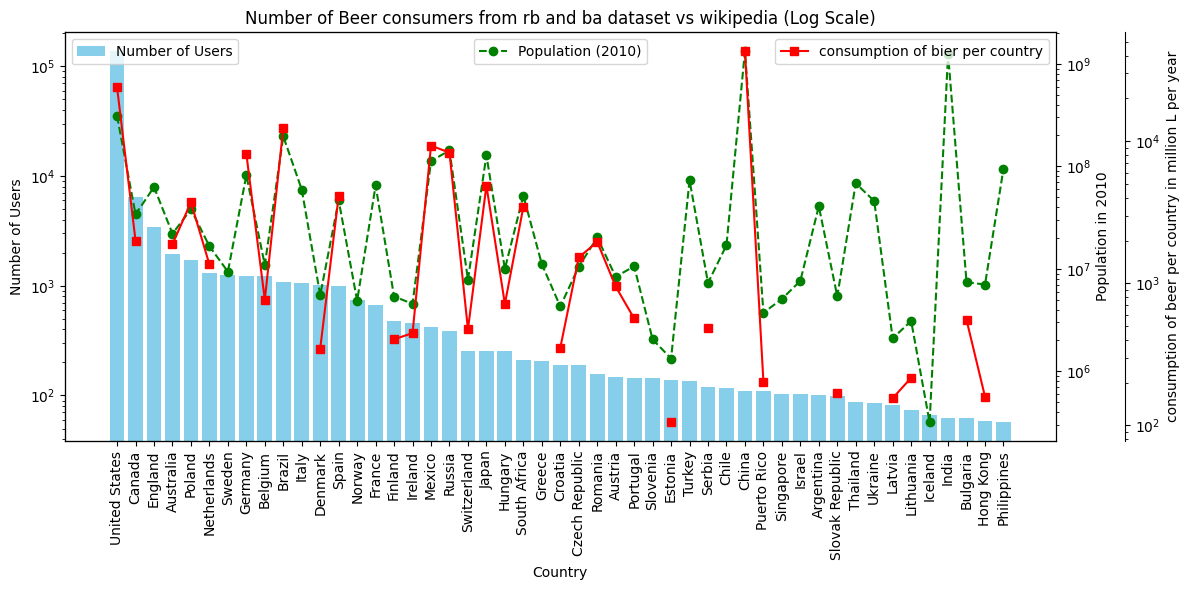

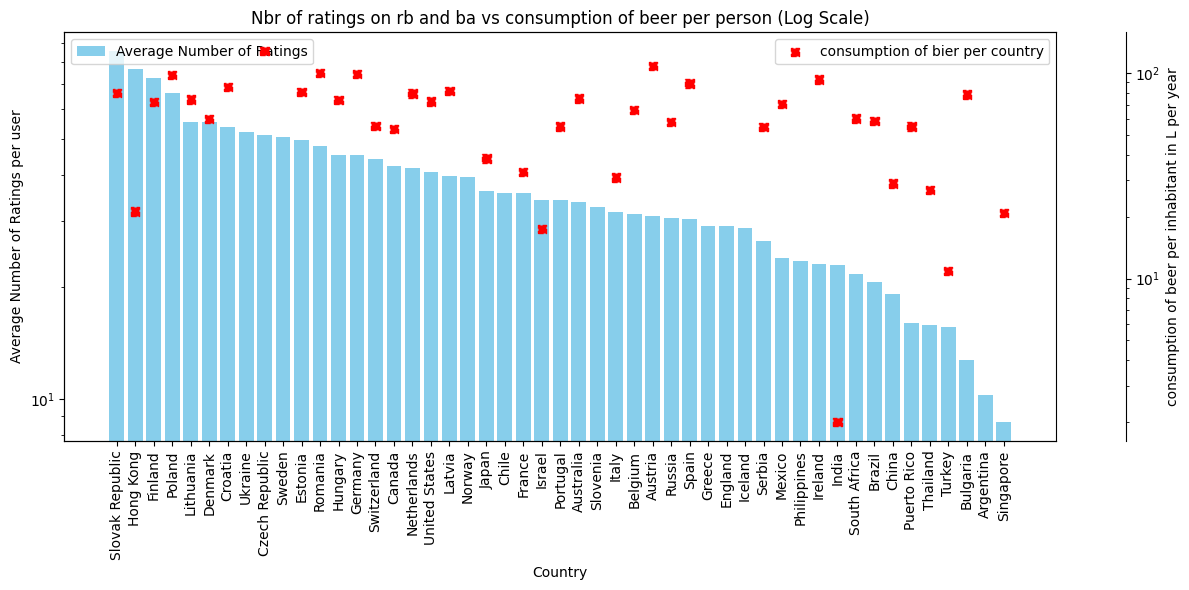

The correlation between the number of inhabitant and the total number of littre of beer consummed by a country is: 0.9465278600760352


In [83]:
# Plot 1: Nbr of Users and population per Country (Log Scale)
fig, ax1 = plt.subplots(figsize=(12, 6))
    # Plot Number of Users
ax1.bar(filtered_country_info['country'], filtered_country_info['num_users'], color='skyblue', label='Number of Users')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Users')
ax1.set_yscale('log')  
ax1.set_title('Number of Beer consumers from rb and ba dataset vs wikipedia (Log Scale)')
ax1.tick_params(axis='x', rotation=90)
    # Plot also the total Population of the country
ax2 = ax1.twinx() #twinx to have another y axis
ax2.plot(filtered_country_info['country'], filtered_country_info['population_in_2010'], color='green', marker='o', linestyle='--', label='Population (2010)')
ax2.set_ylabel('Population in 2010')
ax2.set_yscale('log') 
    # Plot also the consumption of bier per country
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))  #offset for the axis 
ax3.plot(filtered_country_info['country'], filtered_country_info['consumption_per_country_millionL_per_year_wikipedia'],color='red', marker='s', linestyle='-', label='consumption of bier per country')
ax3.set_ylabel('consumption of beer per country in million L per year')
ax3.set_yscale('log')
    # Legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')
ax3.legend(loc='upper right')

# Adjust layout
fig.tight_layout()#for automatic fit within the figure area
plt.show()

#### Plot 2: Percentage of Reviewers per Country (Log Scale) (not very relevant)
# ig, ax1 = plt.subplots(figsize=(12, 6))

# ax1.bar(filtered_country_info['country'], filtered_country_info['num_users'], color='skyblue', label='Number of Users')
# ax1.set_xlabel('Country')
# ax1.set_ylabel('Number of Users')
# ax1.set_yscale('log')  
# ax1.set_title('Number of Beer consumers from rb and ba dataset vs wikipedia normalized (Log Scale)')
# ax1.tick_params(axis='x', rotation=90)

# ax2 = ax1.twinx()
# ax2.plot(filtered_country_info['country'], filtered_country_info['percentage_reviewers_per_country'], color='green', marker='o', linestyle='--', label='Percentage of Reviewers')
# ax2.set_ylabel('Percentage of Reviewers')
# ax2.set_yscale('log') 
#  # Plot also the consumption of bier per country
# ax3 = ax1.twinx()
# ax3.spines['right'].set_position(('outward', 50))  #offset for the axis 
# ax3.plot(filtered_country_info['country'], filtered_country_info['consumption_per_country_millionL_per_year_wikipedia'],color='red', marker='s', linestyle='-', label='consumption of bier per country')
# ax3.set_ylabel('consumption of beer per country in million L per year')
# ax3.set_yscale('log')
#     # Legend
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper center')
# ax3.legend(loc='upper right')
# fig.tight_layout()
# plt.show()

# Plot 3: Avg number of ratings per person per country
filtered_country_info2 = filtered_country_info.sort_values(by='avg_nbr_ratings', ascending=False)
fig, ax1 = plt.subplots(figsize=(12, 6))
    # Plot Number of Users
ax1.bar(filtered_country_info2['country'], filtered_country_info2['avg_nbr_ratings'], color='skyblue', label='Average Number of Ratings')
ax1.set_xlabel('Country')
ax1.set_ylabel('Average Number of Ratings per user')
ax1.set_yscale('log')  
ax1.set_title('Nbr of ratings on rb and ba vs consumption of beer per person (Log Scale)')
ax1.tick_params(axis='x', rotation=90)
    # Plot also the total Population of the country
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 50))  #offset for the axis 
ax2.scatter(filtered_country_info2['country'], filtered_country_info2['consumption_per_inhabitant_L_per_year_wikipedia'],color='red', marker='s', linestyle='--', label='consumption of bier per country')
ax2.set_ylabel('consumption of beer per inhabitant in L per year')
ax2.set_yscale('log')
#legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.tight_layout()
plt.show()


## compute the correlation 
# Using NumPy
data_correlation_computation = filtered_country_info[['population_in_2010', 'consumption_per_country_millionL_per_year_wikipedia']].dropna()
r_numpy = np.corrcoef(data_correlation_computation['population_in_2010'], data_correlation_computation['consumption_per_country_millionL_per_year_wikipedia'])[0, 1]
print(f"The correlation between the number of inhabitant and the total number of littre of beer consummed by a country is: {r_numpy}")


#### Interactive Plot for country_analysis

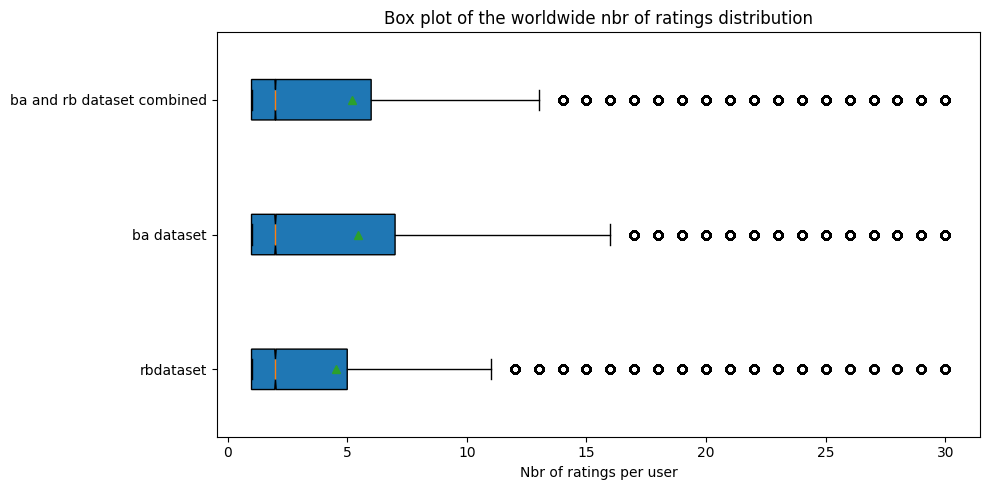

In [86]:
# Figure 1 :plot The consumption per inhabitant for each country
fig1 = px.choropleth(beer_consumption_country_wikipedia, locations='Country', locationmode='country names', color='consumption_per_inhabitant_L_per_year_wikipedia',
                    hover_name='Country',color_continuous_scale=[(0, 'blue'),(0.5, 'yellow'), (1, 'red')],
                    title='Beer Consumption per inhabitant (litres per year)')


# Figure 2 : consumption_per_country_millionL_per_year(wikipedia)
beer_consumption_country_wikipedia['log_consumption_per_country_millionL_per_year_wikipedia'] = np.log1p(beer_consumption_country_wikipedia['consumption_per_country_millionL_per_year_wikipedia'])

fig2 = px.choropleth(
    beer_consumption_country_wikipedia, locations='Country',locationmode='country names',
    hover_name='consumption_per_country_millionL_per_year_wikipedia',hover_data={'log_consumption_per_country_millionL_per_year_wikipedia': False, 'consumption_per_country_millionL_per_year_wikipedia': True},  # hover is the info displayer when the mouse is on the country
    color='log_consumption_per_country_millionL_per_year_wikipedia', color_continuous_scale=[(0, 'blue'),(0.5, 'yellow'), (1, 'red')],
    title='total consumption per country millionL per year (Log Scale)',
)

fig2.update_coloraxes(#we manually add the values on the colarbar
    colorbar_tickmode='array',
    colorbar_tickvals=np.log1p([1, 100, 1000, 10000, 40000]),
    colorbar_ticktext=['1', '100', '1000', '10,000', '40,000'],
    colorbar_title='total consumption per country millionL per year (Log Scale)'
)

# Figure 3 : Number of Reviewers per Country for rb and ba dataset (Log Scale)
country_analysis3['log_num_users'] = np.log1p(country_analysis3['num_users'])
fig3 = px.choropleth(
    country_analysis3,
    locations='country',
    locationmode='country names',
    color='log_num_users',  #for the color we use the loged values as the usa biais is huge
    hover_name='country',
    hover_data={'log_num_users': False, 'num_users': True},  # hover is the info displayer when the mouse is on the country
    color_continuous_scale=[(0, 'blue'),(0.5, 'yellow'), (1, 'red')],
    title='Number of Reviewers per Country for rb and ba dataset (Log Scale)',
    labels={'num_users': 'Number of Reviewers'}
)

fig3.update_coloraxes(
    colorbar_tickmode='array',
    colorbar_tickvals=np.log1p([1, 10, 100, 1000, 10000, 100000]),
    colorbar_ticktext=['1', '10', '100', '1,000', '10,000', '100,000'],
    colorbar_title='Number of Reviewers'
)

# Figure 4 : average nbr of reviews per country
fig4 = px.choropleth(country_analysis3, locations='country', locationmode='country names', color='avg_nbr_ratings',
                    hover_name='country',color_continuous_scale=[(0, 'blue'),(0.5, 'yellow'), (1, 'red')],
                    title='Average number of ratings per country')

# Figure 5 : percentage of reviewers per country (normalized by nbr of inhabitants)
fig5 = px.choropleth(country_analysis3, locations='country', locationmode='country names', color='percentage_reviewers_per_country',
                    hover_name='country',color_continuous_scale=[(0, 'blue'),(0.5, 'yellow'), (1, 'red')],
                    title='number of reviewers per country (normalized by nbr of inhabitants)')

# Figure 6 : percentage of breweries per country (normalized by nbr of inhabitants))#The lower the better for us
country_analysis3['normalized_number_breweries'] = (country_analysis3['nbr_breweries']/country_analysis3['consumption_per_inhabitant_L_per_year_wikipedia'])/ (country_analysis3['population_in_2010']) 
fig6 = px.choropleth(country_analysis3, locations='country', locationmode='country names', color='normalized_number_breweries',
                    hover_name='country',color_continuous_scale=[(0, 'blue'),(0.5, 'yellow'), (1, 'red')],
                    title='Ratio of (number of breweries to liters consumed per person per country) (normalized by nbr of inhabitants)')

# Figure 7 : number of inhabitants (just for information)
fig7 = px.choropleth(country_analysis3, locations='country', locationmode='country names', color='population_in_2010',
                    hover_name='country',color_continuous_scale=[(0, 'blue'),(0.5, 'yellow'), (1, 'red')],
                    title='number of inhabitants per country')

fig = go.Figure()
fig.add_trace(fig1.data[0])
fig.add_trace(fig2.data[0].update(visible=False))
fig.add_trace(fig3.data[0].update(visible=False))
fig.add_trace(fig4.data[0].update(visible=False))
fig.add_trace(fig5.data[0].update(visible=False))
fig.add_trace(fig6.data[0].update(visible=False))
fig.add_trace(fig7.data[0].update(visible=False))

# Initiallise a dictionary for each plot
buttons = [
    dict(label='Beer Consumption per inhabitant (litres per year)',
         method='update',args=[{'visible': [True, False,False,False,False,False,False]},{'title': fig1.layout.title.text}]),
    dict(label='consumption_per_country_millionL_per_year_wikipedia',
         method='update',args=[{'visible': [False, True,False,False,False,False,False]},{'title': fig2.layout.title.text}]),
    dict(label='Number of Reviewers per Country for rb and ba dataset (Log Scale)',
         method='update',args=[{'visible': [False, False,True,False,False,False,False]},{'title': fig3.layout.title.text}]),
    dict(label='Average number of ratings per country',
         method='update',args=[{'visible': [False, False,False,True,False,False,False]},{'title': fig4.layout.title.text}]),
    dict(label='number of reviewers per country (normalized by nbr of inhabitants)',
        method='update',args=[{'visible': [False, False,False,False,True,False,False]},{'title': fig5.layout.title.text}]),
    dict(label='Ratio of nbr of breweries to Litres consumed per person normalized)',
        method='update',args=[{'visible': [False, False,False,False,False,True,False]},{'title': fig6.layout.title.text}]),
    dict(label='number of inhabitants per country',
        method='update',args=[{'visible': [False, False,False,False,False,False,True]},{'title': fig7.layout.title.text}])
]
#manually add dropdown menu
fig.update_layout(
    updatemenus=[dict(type='dropdown',x=0,y=1,showactive=True,active=0,buttons=buttons)],
    width=1000,height=600
)

fig.show()

##Figure II : Boxplot  of nbr of ratings per user per country
#replace to get a single United States
ba_users2 = ba_users.copy()
rb_users2 = rb_users.copy()
ba_users2 = ba_users2[ba_users2['nbr_ratings']<= 30]#discard probable bots/fake acoounts
rb_users2 = rb_users2[rb_users2['nbr_ratings']<= 30]
ba_users2['location']=ba_users['location'].str.replace(r'^United States, .*$', 'United States', regex=True)
rb_users2['location']=rb_users['location'].str.replace(r'^United States, .*$', 'United States', regex=True)

valid_countries = country_analysis3[country_analysis3['num_users'] >= 50]['country']
filtered_ba_users = ba_users2[ba_users2['location'].isin(valid_countries)]
filtered_rb_users = rb_users2[rb_users2['location'].isin(valid_countries)]
combined_ba_rb=pd.concat([filtered_rb_users, filtered_ba_users], axis=0)

fig = px.box(filtered_ba_users , x="location", y="nbr_ratings")
fig.update_layout(
  title="Number of ratings per user per country for BeerAdvocate",
  xaxis_title="Country",
  yaxis_title="Number of ratings",
)
fig.show()
fig = px.box(filtered_rb_users , x="location", y="nbr_ratings")
fig.update_layout(
  title="Number of ratings per user per country for RateBeer",
  xaxis_title="Country",
  yaxis_title="Number of ratings",
)
fig.show()

##Figure III : Boxplot  of nbr of ratings per user worldwide

fig, ax = plt.subplots(figsize=(10, 5))
# Create the box plot
box = ax.boxplot(
    [filtered_rb_users['nbr_ratings'], filtered_ba_users['nbr_ratings'], combined_ba_rb['nbr_ratings']],
    vert=False,#we want horizontal 
    patch_artist=True,  # Enable filling with color
    showmeans=True,  # Show mean as a marker
    notch=True, #for confidence intervals
)
ax.set_yticklabels(["rbdataset", "ba dataset", "ba and rb dataset combined"])
ax.set_title("Box plot of the worldwide nbr of ratings distribution")
ax.set_xlabel("Nbr of ratings per user")

plt.tight_layout()
plt.show()


We noticed some problem with the data, specifically concerning the average number of ratings per country. A bot has probably been used and fakes our data.
![Sample Image](src/Photo/Problem_with_data.png)

In [87]:
#interractive camember plot using pyplot

#first, we will create a new dataset only for this plot where we drop the small countries with less than 100
filtered_country_info_plotA = filtered_country_info[country_info['num_users'] >= 1000]
fig = px.pie(
    filtered_country_info_plotA,
    values='num_users',
    names='country',
    title='Percentage of Reviewers per country worldwide for the rb and the ba dataset',
    labels={'country': 'Country', 'num_users': 'Number of Reviewers per countries population'}
)
fig.show()

#then we plot the same data but we normalise by the countries population
filtered_country_info_plotA['normalized_nbr_reviewers'] = (filtered_country_info_plotA['num_users'] / filtered_country_info_plotA['population_in_2010'])*100 
fig = px.pie(
    filtered_country_info_plotA,
    values='normalized_nbr_reviewers',
    names='country',
    title='Percentage of Reviewers per country worldwide for the rb and the ba dataset (normalized by population)',
    labels={'country': 'Country', 'normalized_nbr_reviewers': 'Number of Reviewers'}
)
fig.show()

C:\Users\tomra\AppData\Local\Temp\ipykernel_32828\2342780760.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



C:\Users\tomra\AppData\Local\Temp\ipykernel_32828\2342780760.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
#bar plot with the data from wikipedia (less biased) with country_analysis3 of both the percentage of reviewers and the consumption per inhabitant
#using plotly
# Create the interactive plot (go is also from plotly but lower level)
filtered_country_info2_plotA = filtered_country_info2.sort_values(by='consumption_per_inhabitant_L_per_year_wikipedia', ascending=False)
fig = go.Figure()

fig.add_trace(go.Bar(
    x=filtered_country_info2_plotA['country'],
    y=filtered_country_info2_plotA['percentage_reviewers_per_country'],
    name='Percentage Reviewers per Country',
    yaxis='y'
))

fig.add_trace(go.Bar(
    x=filtered_country_info2_plotA['country'],
    y=filtered_country_info2_plotA['consumption_per_inhabitant_L_per_year_wikipedia'],
    name='Consumption per Inhabitant L per Year (Wikipedia)',
    yaxis='y2'
))
fig.update_layout(
    title="Comparison of Reviewers Percentage from both datasets and Consumption",
    xaxis=dict(title="Country"),
    yaxis=dict(title="Percentage Reviewers per Country",side="left"
    ),
    yaxis2=dict(title="Consumption per Inhabitant L per Year (Wikipedia)",side="right",overlaying="y"  
    ),
    legend=dict(title="Legend")
)

fig.show()


Looking at the number of users as a percentage of their population, we can observe that the usa have a disproportionate share of users. This in turn, due the large population of the USA, leads to a overrepresentation of those users. This can explain why US beers and breweries have the most ratings.  

### Part 3.2 : Is there place for a new beer company or is the market already saturated
We can examine the number of breweries in each country in relation to the number of customers from that country.

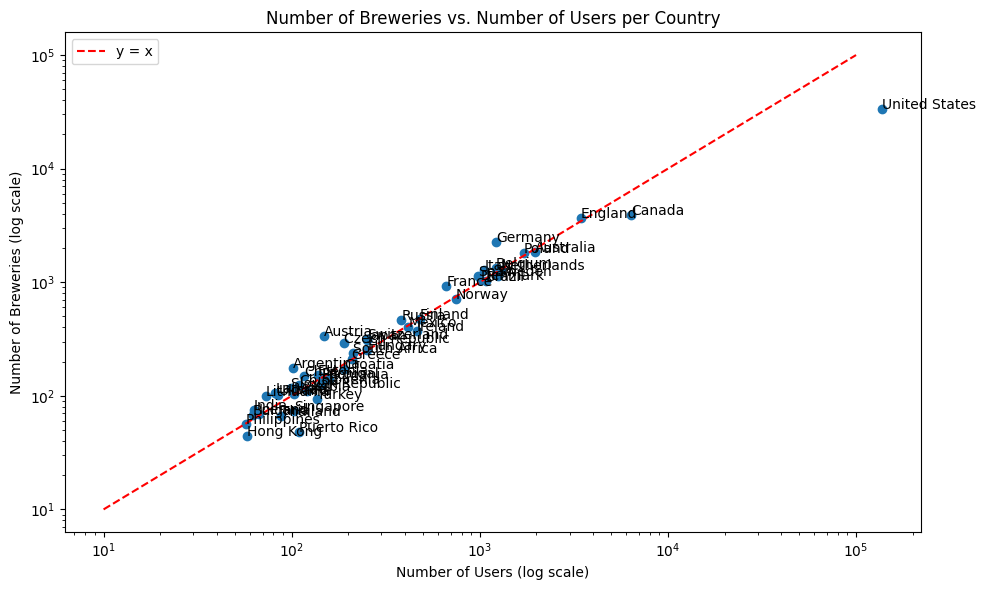

In [ ]:
#As a small startup, we would like to know the average number of reviews that breweries from a country can get, to understand the competition 
# in the market and if it's possible the easily become known in the market.

# discard countries with less than 50 users
filtered_country_info = country_analysis2[country_analysis2['num_users'] >= 50]
# Scatter plot of nbr breweries vs. nbr of usersfor each country
plt.figure(figsize=(10, 6))
plt.scatter(filtered_country_info['num_users'], filtered_country_info['nbr_breweries'])

# Add labels for each country 
for i, row in filtered_country_info.iterrows():
    plt.text(row['num_users'], row['nbr_breweries'], row['country'])

x44 = np.logspace(1, 5, 100)
plt.plot(x44, x44, color='red', linestyle='--', label='y = x') 

# log scale to handle wide ranges (mostly for the usa)
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('Number of Users (log scale)')
plt.ylabel('Number of Breweries (log scale)')
plt.title('Number of Breweries vs. Number of Users per Country')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

C:\Users\tomra\AppData\Local\Temp\ipykernel_32828\861756880.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tomra\AppData\Local\Temp\ipykernel_32828\861756880.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

posx and posy should be finite values
posx and posy should be finite values


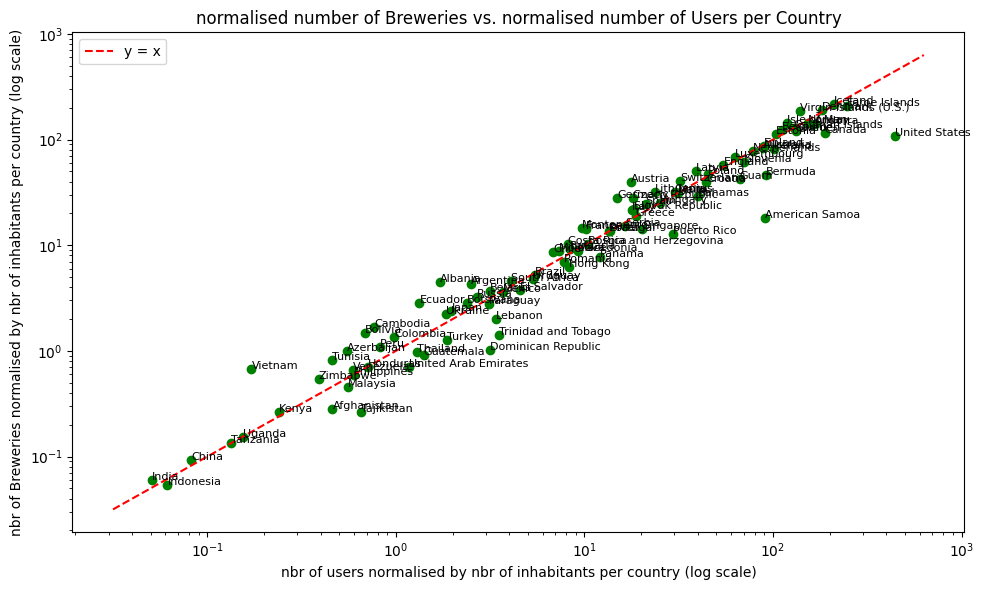

In [92]:
# Assume 'population_in_2010' column exists in your 'country_analysis2' DataFrame for each country
# Filter countries with at least 50 users
filtered_country_info = country_analysis2[country_analysis2['num_users'] >= 5]

# Calculate users and breweries per million people to normalize by population
filtered_country_info['users_per_million'] = (filtered_country_info['num_users'] / filtered_country_info['population_in_2010']) * 1e6
filtered_country_info['breweries_per_million'] = (filtered_country_info['nbr_breweries'] / filtered_country_info['population_in_2010']) * 1e6

# Scatter plot of breweries per million vs. users per million for each country
plt.figure(figsize=(10, 6))
plt.scatter(filtered_country_info['users_per_million'], filtered_country_info['breweries_per_million'], color='green')

# Add labels for each country
for i, row in filtered_country_info.iterrows():
    plt.text(row['users_per_million'], row['breweries_per_million'], row['country'], fontsize=8)

x2 = np.logspace(-1.5, 2.8, 100)
plt.plot(x2, x2, color='red', linestyle='--', label='y = x') 

# Use log scale to handle wide ranges
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('nbr of users normalised by nbr of inhabitants per country (log scale)')
plt.ylabel('nbr of Breweries normalised by nbr of inhabitants per country (log scale)')
plt.title('normalised number of Breweries vs. normalised number of Users per Country')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


C:\Users\tomra\AppData\Local\Temp\ipykernel_32828\3666014920.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



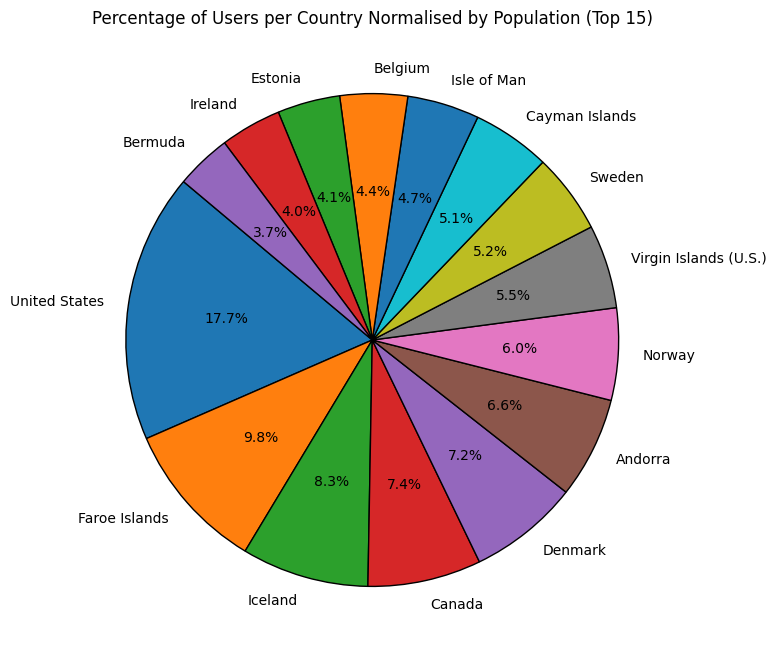

In [93]:
filtered_country_info = country_analysis2[country_analysis2['num_users'] >= 5]

# Calculate users per million people to normalize by population
filtered_country_info['norm_num_users'] = (filtered_country_info['num_users'] / filtered_country_info['population_in_2010']) 

# Sort values by users per million for better visualization and select the top 15 countries
filtered_country_info = filtered_country_info.sort_values(by='norm_num_users', ascending=False).head(15)

# Plot the pie chart of users per million
plt.figure(figsize=(8, 8))
plt.pie(
    filtered_country_info['norm_num_users'], 
    labels=filtered_country_info['country'], 
    autopct='%1.1f%%',  #to have the percentages on the pie chart
    startangle=140,
    wedgeprops=dict(edgecolor='black')
)

# Title
plt.title('Percentage of Users per Country Normalised by Population (Top 15)')

# Show plot
plt.show()

## PART 4 : Market Analysis : find the correct price and beer type for our beer

### Analysis of the dataset and first results concerning the customers habit
We will now analyze the different prices depending on beer type and origin in order to be able to launch our product in the **right price range** and also the correct **beer type**.

#### Beer Type analysis and choice

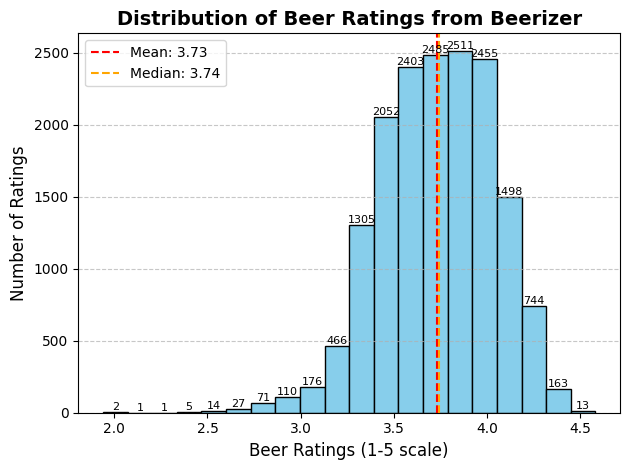

In [94]:
#lets first look at the grade distribution
counts, bins, patches = plt.hist(df_beerizer['Rating'], bins=20, color='skyblue', edgecolor='black')
mean = df_beerizer['Rating'].mean()
median = df_beerizer['Rating'].median()

plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='orange', linestyle='--', label=f'Median: {median:.2f}')
plt.legend()

# Annotate Bars
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
             ha='center', va='bottom', fontsize=8)

plt.xlabel('Beer Ratings (1-5 scale)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.title('Distribution of Beer Ratings from Beerizer', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

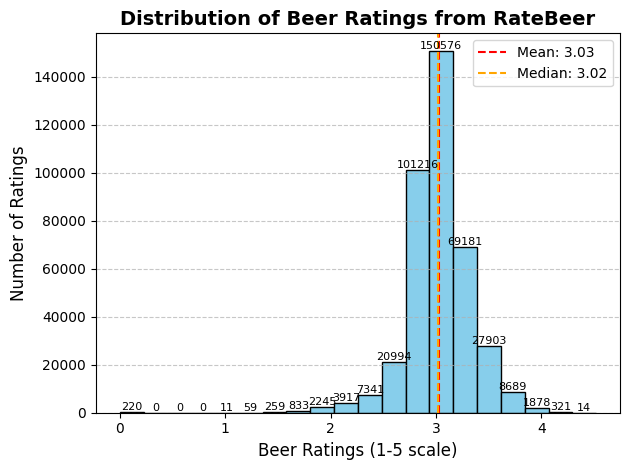

Total number of ratings in Beerizer: 16634


In [112]:
df_RateBeer = rb_beers
#clean the dataset
#drop rows with missing values
# df_RateBeer = df_RateBeer.dropna()

#lets first look at the grade distribution
counts, bins, patches = plt.hist(df_RateBeer['avg'], bins=20, color='skyblue', edgecolor='black')
mean = df_RateBeer['avg'].mean()
median = df_RateBeer['avg'].median()

plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='orange', linestyle='--', label=f'Median: {median:.2f}')
plt.legend()

# Annotate Bars
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
             ha='center', va='bottom', fontsize=8)

plt.xlabel('Beer Ratings (1-5 scale)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.title('Distribution of Beer Ratings from RateBeer', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#print total number of ratings
print(f"Total number of ratings in Beerizer: {len(df_beerizer)}")

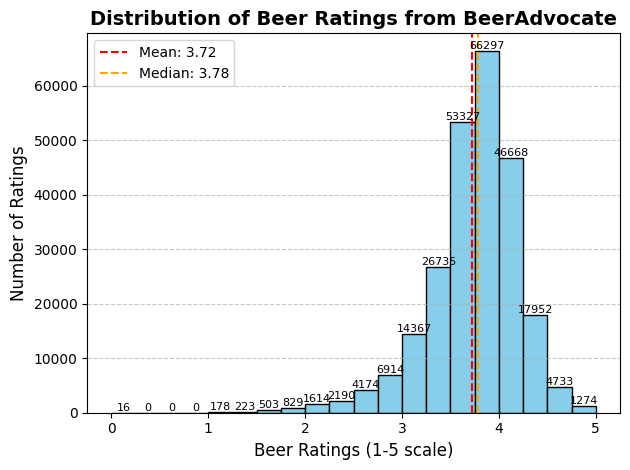

Total number of ratings in BeerAdvocate: 280823


In [113]:
df_BeerAdvocate = ba_beers
#clean the dataset
#drop rows with missing values
# df_BeerAdvocate = df_BeerAdvocate.dropna()


#lets first look at the grade distribution
counts, bins, patches = plt.hist(df_BeerAdvocate['avg'], bins=20, color='skyblue', edgecolor='black')
mean = df_BeerAdvocate['avg'].mean()
median = df_BeerAdvocate['avg'].median()

plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='orange', linestyle='--', label=f'Median: {median:.2f}')
plt.legend()

# Annotate Bars
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
             ha='center', va='bottom', fontsize=8)

plt.xlabel('Beer Ratings (1-5 scale)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.title('Distribution of Beer Ratings from BeerAdvocate', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#print total number of ratings
print(f"Total number of ratings in BeerAdvocate: {len(df_BeerAdvocate)}")

#### Average rating per beer type

In [114]:
mean_grade_per_type = df_beerizer.groupby('Beer_type_general')['Rating'].mean(numeric_only=True)
std_grade_per_type = df_beerizer.groupby('Beer_type_general')['Rating'].std(numeric_only=True)
number_per_type = df_beerizer['Beer_type_general'].value_counts()
mean_grade_per_type = mean_grade_per_type.sort_values(ascending=False)
std_grade_per_type = std_grade_per_type[mean_grade_per_type.index]
number_per_type = number_per_type[mean_grade_per_type.index]
#remove nans
mean_grade_per_type = mean_grade_per_type.dropna()
std_grade_per_type = std_grade_per_type.dropna()
#remove types with less than n ratings
min_number_ratings = 10
mean_grade_per_type = mean_grade_per_type[df_beerizer['Beer_type_general'].value_counts() > min_number_ratings]
std_grade_per_type = std_grade_per_type[df_beerizer['Beer_type_general'].value_counts() > min_number_ratings]
print(f"There is a total of {len(mean_grade_per_type)} beer types with a least {min_number_ratings} ratings")

There is a total of 54 beer types with a least 10 ratings


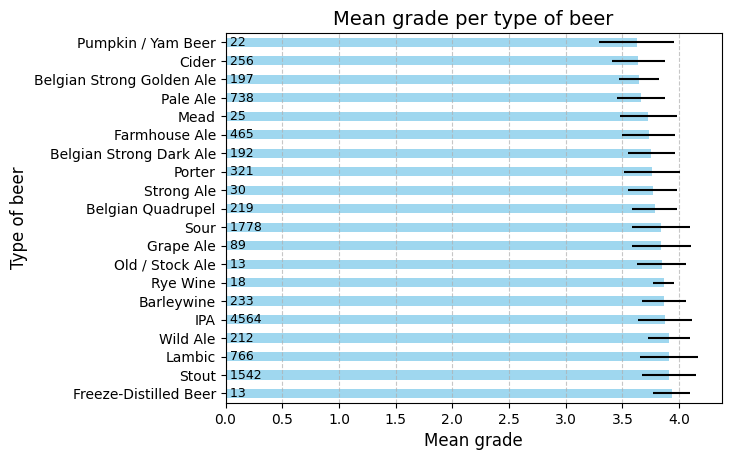

In [115]:
plt.figure()

# Plot the 20 beer types with best grades using a horizontal bar chart
mean_grade_per_type.head(20).plot(kind='barh', xerr=std_grade_per_type.head(20), color='skyblue', alpha=0.8)

# Add numbers of ratings next to the bars
for i, beer_type in enumerate(mean_grade_per_type.head(20).index):
    num_ratings = df_beerizer['Beer_type_general'].value_counts()[beer_type]
    plt.text(0, i, f' {num_ratings}', va='center', ha='left', fontsize=9, color='black')

plt.ylabel('Type of beer', fontsize=12)
plt.xlabel('Mean grade', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Mean grade per type of beer', fontsize=14)
plt.show()

#### More precise beer style
Let's now look at more precise beer styles.

In [120]:
mean_grade_per_type = df_beerizer.groupby('Beer_type')['Rating'].mean(numeric_only=True)
std_grade_per_type = df_beerizer.groupby('Beer_type')['Rating'].std(numeric_only=True)
mean_grade_per_type = mean_grade_per_type.sort_values(ascending=False)
std_grade_per_type = std_grade_per_type[mean_grade_per_type.index]
#remove nans
mean_grade_per_type = mean_grade_per_type.dropna()
std_grade_per_type = std_grade_per_type.dropna()
#remove types with less than n ratings
min_number_ratings = 10
mean_grade_per_type = mean_grade_per_type[df_beerizer['Beer_type'].value_counts()
                                           > min_number_ratings]
std_grade_per_type = std_grade_per_type[df_beerizer['Beer_type'].value_counts()
                                         > min_number_ratings]
print(f"There is a total of {len(mean_grade_per_type)} sub beer types\
       with a mean rating having a least {min_number_ratings} ratings")

There is a total of 179 sub beer types       with a mean rating having a least 10 ratings


Let's look into more detail which sub beer style is most appreciated

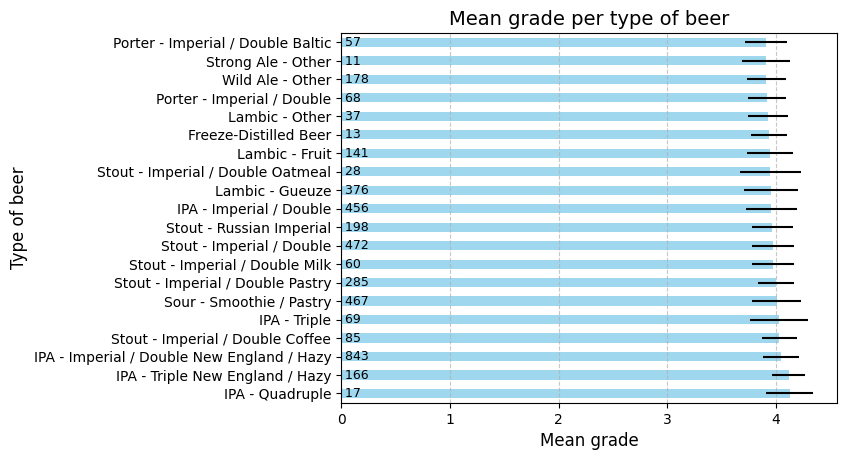

In [121]:
plt.figure()

# Plot the 20 beer types with best grades using a horizontal bar chart
mean_grade_per_type.head(20).plot(kind='barh', xerr=std_grade_per_type.head(20), color='skyblue', alpha=0.8)

# Add numbers of ratings next to the bars
for i, beer_type in enumerate(mean_grade_per_type.head(20).index):
    num_ratings = df_beerizer['Beer_type'].value_counts()[beer_type]
    plt.text(0, i, f' {num_ratings}', va='center', ha='left', fontsize=9, color='black')

plt.ylabel('Type of beer', fontsize=12)
plt.xlabel('Mean grade', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Mean grade per type of beer', fontsize=14)
plt.show()

#### Under-represented types, best market entry
Now looking at potential market entry. Satured beer styles might not be the best for newcomers therefore we look at beer styles having less ratings but still with a decent number to have meaningfull data.

There is a total of 48 beer types with a least 5 and less than 20 ratings


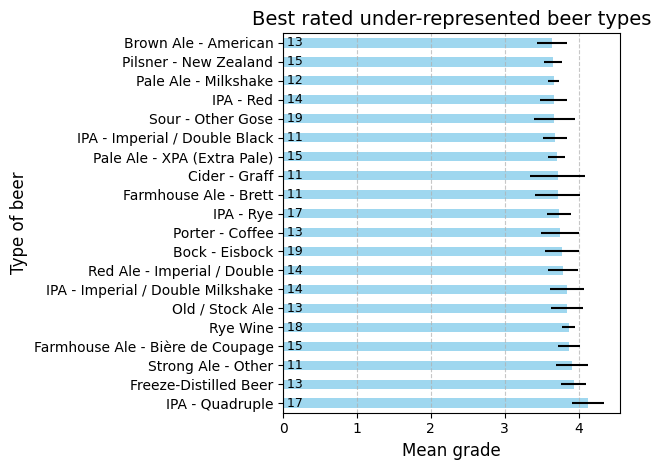

In [122]:
#best rated beers type in a given range of number of ratings
range_ratings = (5, 20)
mean_grade_per_type = mean_grade_per_type[df_beerizer['Beer_type'].value_counts() > range_ratings[0]]
mean_grade_per_type = mean_grade_per_type[df_beerizer['Beer_type'].value_counts() < range_ratings[1]]
std_grade_per_type = std_grade_per_type[df_beerizer['Beer_type'].value_counts() > range_ratings[0]]
std_grade_per_type = std_grade_per_type[df_beerizer['Beer_type'].value_counts() < range_ratings[1]]
plt.figure()

print(f"There is a total of {len(mean_grade_per_type)} beer types with a least {range_ratings[0]} and less than {range_ratings[1]} ratings")

# Plot the 20 beer types with best grades
mean_grade_per_type.head(20).plot(kind='barh', xerr=std_grade_per_type.head(20), color='skyblue', alpha=0.8)

# Add numbers of ratings next to the bars
for i, beer_type in enumerate(mean_grade_per_type.head(20).index):
    num_ratings = df_beerizer['Beer_type'].value_counts()[beer_type]
    plt.text(0, i, f' {num_ratings}', va='center', ha='left', fontsize=9, color='black')

# Adjust labels and title
plt.ylabel('Type of beer', fontsize=12)
plt.xlabel('Mean grade', fontsize=12)
plt.title('Best rated under-represented beer types', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Average price per beer type

In [123]:
mean_price_per_type = df_beerizer.groupby('Beer_type')['Price_per_litter'].mean()
std_price_per_type = df_beerizer.groupby('Beer_type')['Price_per_litter'].std()
#remove nans
mean_price_per_type = mean_price_per_type.dropna()
std_price_per_type = std_price_per_type.dropna()
#remove types with less than 10 prices
min_number_beers = 10
mean_price_per_type = mean_price_per_type[df_beerizer['Beer_type'].value_counts()
                                           > min_number_beers]
std_price_per_type = std_price_per_type[df_beerizer['Beer_type'].value_counts() 
                                        > min_number_beers]

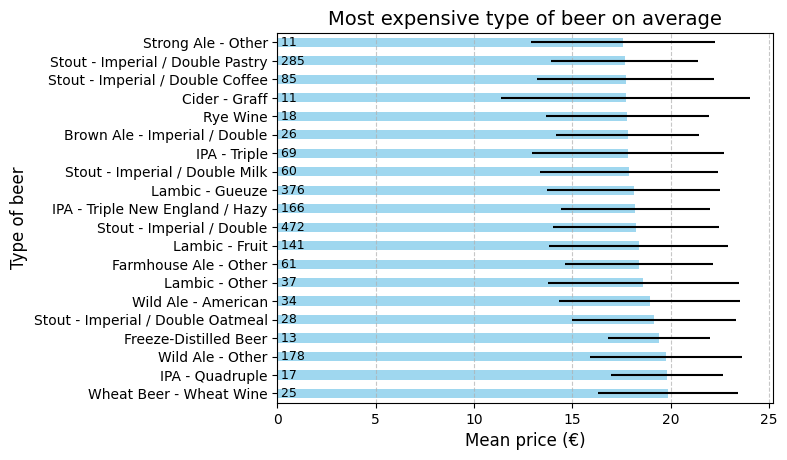

In [124]:
plt.figure()

mean_price_per_type = mean_price_per_type.sort_values(ascending=False)
std_price_per_type = std_price_per_type[mean_price_per_type.index]

# Plot the 20 more expensive beer types
mean_price_per_type.head(20).plot(kind='barh', xerr=std_price_per_type.head(20), color='skyblue', alpha=0.8)


# Add numbers of ratings next to the bars
for i, beer_type in enumerate(mean_price_per_type.head(20).index):
    num_ratings = df_beerizer['Beer_type'].value_counts()[beer_type]
    plt.text(0, i, f' {num_ratings}', va='center', ha='left', fontsize=9, color='black')

plt.ylabel('Type of beer', fontsize=12)
plt.xlabel('Mean price (€)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Most expensive type of beer on average', fontsize=14)
plt.show()

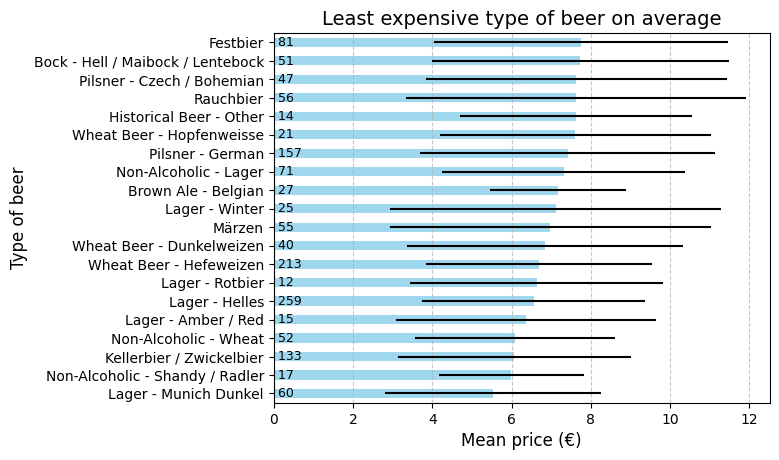

In [125]:
plt.figure()

mean_price_per_type = mean_price_per_type.sort_values(ascending=True)
std_price_per_type = std_price_per_type[mean_price_per_type.index]

# Plot the 20 more expensive beer types
mean_price_per_type.head(20).plot(kind='barh', xerr=std_price_per_type.head(20), color='skyblue', alpha=0.8)


# Add numbers of ratings next to the bars
for i, beer_type in enumerate(mean_price_per_type.head(20).index):
    num_ratings = df_beerizer['Beer_type'].value_counts()[beer_type]
    plt.text(0, i, f' {num_ratings}', va='center', ha='left', fontsize=9, color='black')

plt.ylabel('Type of beer', fontsize=12)
plt.xlabel('Mean price (€)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Least expensive type of beer on average', fontsize=14)
plt.show()

#### Average price and rating depending on the origin

In [126]:
origins = df_beerizer['Origin'].unique()
print(f"There are {len(origins)} different origins in the dataset")
df_origins = pd.DataFrame(index=origins, columns=['Mean_grade', 'std_grade', 'Number_beers', 'Mean_price_euro_per_litter', 'std_price'])
df_origins.index.name = 'Origin'

df_origins['Mean_grade'] = df_beerizer.groupby('Origin')['Rating'].mean()
df_origins['std_grade'] = df_beerizer.groupby('Origin')['Rating'].std()
df_origins['std_grade'] = df_origins['std_grade'].fillna(0)
df_origins['Number_beers'] = df_beerizer['Origin'].value_counts()
df_origins['Mean_price_euro_per_litter'] = df_beerizer.groupby('Origin')['Price_per_litter'].mean()
df_origins['std_price'] = df_beerizer.groupby('Origin')['Price_per_litter'].std()
df_origins['std_price'] = df_origins['std_price'].fillna(0)
df_origins.index = df_origins.index.map(lambda x: f'{x}')
#save to csv
df_origins.reset_index(inplace=True)
df_origins.to_csv('origin_stats.csv')

There are 58 different origins in the dataset


In [127]:
fig = px.choropleth(
    df_origins,
    locations="Origin",  
    locationmode="country names",  
    color="Mean_price_euro_per_litter",  
    title="Beer Statistics by Country",
    color_continuous_scale="Viridis", 
)


# Customize layout
fig.update_layout(
    title_font_size=18,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    )
)

fig.show()

#### Price normalized depending on the average income

In [132]:
df_origins = df_origins.merge(df_median_income, left_on='Origin', right_on='Country', how='left')
df_origins['Price_norm_income_score'] = df_origins['Mean_price_euro_per_litter'] / df_origins['Income'] 
#normalize between 0 to 100
df_origins['Price_norm_income_score'] = (df_origins['Price_norm_income_score'] - df_origins['Price_norm_income_score'].min()) / (df_origins['Price_norm_income_score'].max() - df_origins['Price_norm_income_score'].min()) * 100

df_origins.to_csv('./data/origin_stats.csv')

In [133]:
#plot the price normalized by income on a map
fig = px.choropleth(
    df_origins,
    locations="Origin",  
    locationmode="country names",  
    color="Price_norm_income_score",  
    title="Beer Price adjsuter by mean Income",
    color_continuous_scale="Viridis", 
)


# Customize layout
fig.update_layout(
    title_font_size=18,
    geo=dict(
        showframe=False,
        showcoastlines=True
    )
)

#### Mean income vs average beer ratings per country

In [135]:
#remove countries with less than 10 beers
df_origins = df_origins[df_origins['Number_beers'] > 10]
norm_mean_grade = (df_origins['Mean_grade'] - df_origins['Mean_grade'].min()) / (df_origins['Mean_grade'].max() - df_origins['Mean_grade'].min())
norm_income = (df_origins['Income'] - df_origins['Income'].min()) / (df_origins['Income'].max() - df_origins['Income'].min())

df_origins['income_average_rating'] = norm_mean_grade / norm_income
# df_origins['income_average_rating'] = (df_origins['income_average_rating'] - df_origins['income_average_rating'].min()) / (df_origins['income_average_rating'].max() - df_origins['income_average_rating'].min()) * 100
# df_origins['income_average_rating'] = df_origins['Mean_grade'] / df_origins['Income']
df_origins.to_csv('origin_stats.csv')

fig = px.choropleth(
    df_origins,
    locations="Origin",  
    locationmode="country names",  
    color="income_average_rating",  
    title="Income adjusted average rating",
    color_continuous_scale="Viridis", 
)


# Customize layout
fig.update_layout(
    title_font_size=18,
    geo=dict(
        showframe=False,
        showcoastlines=True
    )
)

In [136]:
#print the top 5 countries with the best income adjusted average rating
print(df_origins.sort_values('income_average_rating', ascending=False).head())

     Origin  Mean_grade  std_grade  Number_beers  Mean_price_euro_per_litter  \
17   Brazil    3.903913   0.482538            23                   13.691739   
35   Serbia    3.740909   0.125495            11                   14.087273   
30   Greece    3.956471   0.239581            34                   16.583824   
24  Romania    3.887234   0.204996           194                   14.022113   
3    Poland    3.721273   0.252546           858                   10.244545   

    std_price Country_x  Year_x  Income_x  Price_norm_income_score Country_y  \
17   4.034283    Brazil  2022.0   4127.94                66.081915    Brazil   
35   2.923974    Serbia  2022.0   5135.68                52.967057    Serbia   
30   4.344441    Greece  2016.0   8376.19                35.525317    Greece   
24   4.010625   Romania  2021.0   8972.35                25.993292   Romania   
3    4.768301    Poland  2020.0  10281.97                13.046917    Poland   

    Year_y  Income_y  Country    Year 

#### Price distribution depending on origin and beer type

In [134]:
df = df_beerizer.copy()

# Dropdown widgets for filtering
beer_type_dropdown = widgets.Dropdown(
    options=['All'] + list(df['Beer_type'].unique()),
    value='All',
    description='Beer Type:',
)
origin_dropdown = widgets.Dropdown(
    options=['All'] + list(df['Origin'].unique()),
    value='All',
    description='Origin:',
)

# Function to update the plot
def update_plot(beer_type, origin):
    filtered_df = df.copy()
    if beer_type != 'All':
        filtered_df = filtered_df[filtered_df['Beer_type'] == beer_type]
    if origin != 'All':
        filtered_df = filtered_df[filtered_df['Origin'] == origin]

    # Calculate price range
    if not filtered_df.empty:
        price_min = filtered_df['Price_per_litter'].min()
        price_max = filtered_df['Price_per_litter'].max()
        print(f"Price range: {price_min:.2f} - {price_max:.2f}")
    else:
        print("No data for the selected filters.")

    # Create an interactive plot with Plotly
    fig = px.box(
        filtered_df,
        x='Beer_type',
        y='Price_per_litter',
        color='Origin',
        title="Price Distribution by Beer Type and Origin",
        labels={'Price_per_litter': 'Price (€/l)', 'Beer_type': 'Beer Type'},
        
    )
    fig.show()

widgets.interactive(update_plot, beer_type=beer_type_dropdown, origin=origin_dropdown)
display(beer_type_dropdown, origin_dropdown)

Dropdown(description='Beer Type:', options=('All', 'Barleywine - Other', 'Stout - Milk / Sweet', 'IPA - New En…

Dropdown(description='Origin:', options=('All', 'Netherlands', 'United States', 'Spain', 'Poland', 'England', …

## PART 5 : Time analysis 

In [95]:
#convert date to datetime, keep only days
ba_ratings['date'] = pd.to_datetime(ba_ratings['date'], origin='unix', unit='s').dt.date
rb_ratings['date'] = pd.to_datetime(rb_ratings['date'], origin='unix', unit='s').dt.date


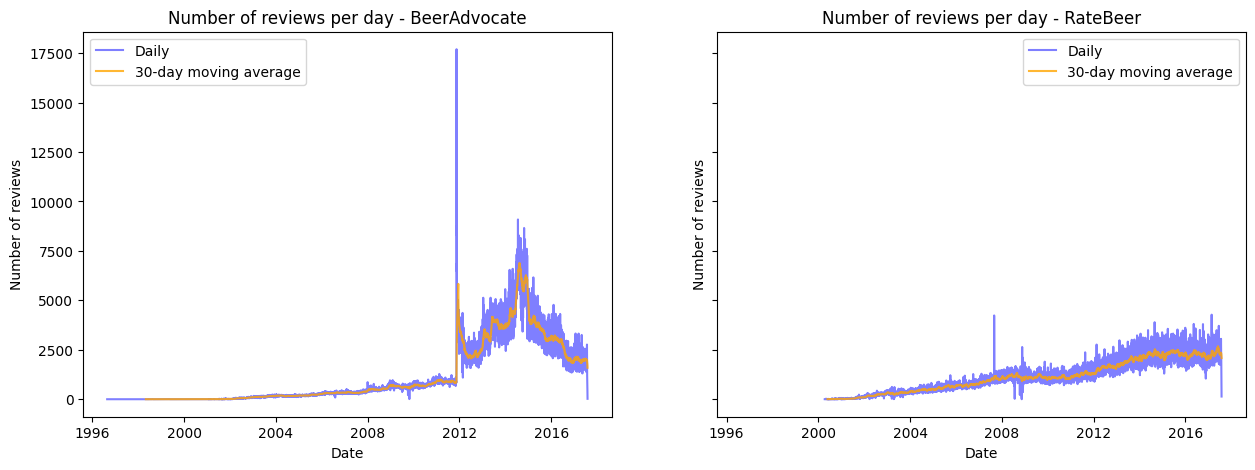

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
#number of reviews per day
daily_count_BA = ba_ratings['date'].value_counts().sort_index()
#add 30 days moving average to smooth the curve
rolling_avg_BA = daily_count_BA.rolling(window=30).mean()

daily_count_RB = rb_ratings['date'].value_counts().sort_index()
rolling_avg_RB = daily_count_RB.rolling(window=30).mean()

axes[0].plot(daily_count_BA, alpha=0.5, label='Daily', color='blue')
axes[0].plot(rolling_avg_BA, alpha=0.8, label='30-day moving average', color='orange')
axes[0].set_title('Number of reviews per day - BeerAdvocate')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of reviews')
axes[0].legend()

axes[1].plot(daily_count_RB, alpha=0.5, label='Daily', color='blue')
axes[1].plot(rolling_avg_RB, alpha=0.8, label='30-day moving average', color='orange')
axes[1].set_title('Number of reviews per day - RateBeer')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of reviews')
axes[1].legend()

plt.show()

In [97]:
#let's investigate the peak in Beeadvocate
ba_ratings['date'].value_counts().sort_values(ascending=False).head(10)

date
2011-11-15    17696
2011-11-14    17131
2011-11-16     9593
2014-07-20     9088
2011-11-18     8770
2014-10-26     8658
2011-11-17     8292
2014-08-03     8282
2014-09-01     8153
2014-11-09     8085
Name: count, dtype: int64

In [98]:
#the peak comes five days : 2011-11-14, 2011-11-15, 2011-11-16, 2011-11-17, 2011-11-18
#randomly remove reviews from these days to have max 4000 reviews per day
#remove 500 reviews per day
max = 5000
for i in range(30):
    number = (ba_ratings['date'] == pd.to_datetime(f"2011-11-{i+1}").date()).sum()
    # print(number)
    if number > max:
        ba_ratings = ba_ratings.drop(ba_ratings[ba_ratings['date'] == pd.to_datetime(f"2011-11-{i+1}").
                                                date()].sample(number-max).index)

#check the peak is removed
ba_ratings['date'].value_counts().sort_values(ascending=False).head(10)



date
2014-07-20    9088
2014-10-26    8658
2014-08-03    8282
2014-09-01    8153
2014-11-09    8085
2014-10-28    8018
2014-07-27    7732
2014-07-19    7698
2014-08-10    7649
2014-07-13    7609
Name: count, dtype: int64

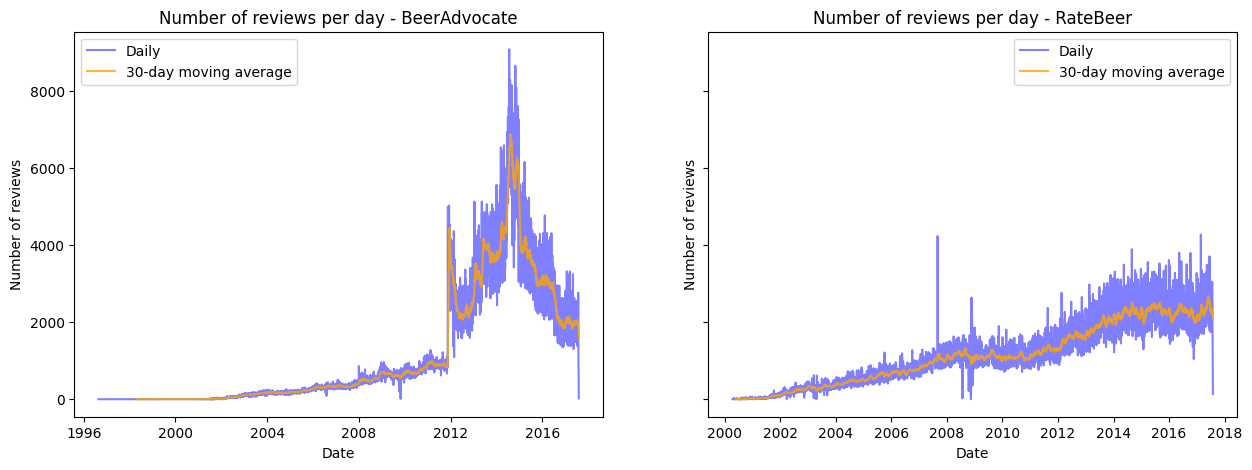

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#number of reviews per day
daily_count_BA = ba_ratings['date'].value_counts().sort_index()
#add 30 days moving average to smooth the curve
rolling_avg_BA = daily_count_BA.rolling(window=30).mean()

daily_count_RB = rb_ratings['date'].value_counts().sort_index()
rolling_avg_RB = daily_count_RB.rolling(window=30).mean()

axes[0].plot(daily_count_BA, alpha=0.5, label='Daily', color='blue')
axes[0].plot(rolling_avg_BA, alpha=0.8, label='30-day moving average', color='orange')
axes[0].set_title('Number of reviews per day - BeerAdvocate')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of reviews')
axes[0].legend()

axes[1].plot(daily_count_RB, alpha=0.5, label='Daily', color='blue')
axes[1].plot(rolling_avg_RB, alpha=0.8, label='30-day moving average', color='orange')
axes[1].set_title('Number of reviews per day - RateBeer')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of reviews')
axes[1].legend()

plt.show()

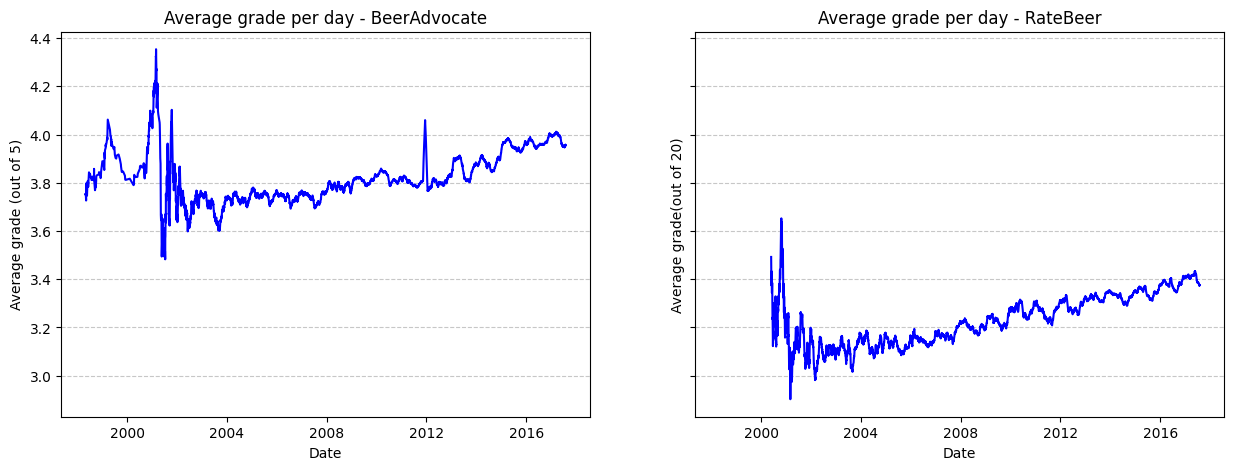

In [100]:
#look at the evolution of the average grade over time
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)

#use moving average to smooth the curve
ba_average_grade = ba_ratings.groupby('date')['rating'].mean().rolling(window=30).mean()
rb_average_grade = rb_ratings.groupby('date')['rating'].mean().rolling(window=30).mean()

axes[0].plot(ba_average_grade, color='blue')
axes[0].set_title('Average grade per day - BeerAdvocate')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average grade (out of 5)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].plot(rb_average_grade, color='blue')
axes[1].set_title('Average grade per day - RateBeer')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average grade(out of 20)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

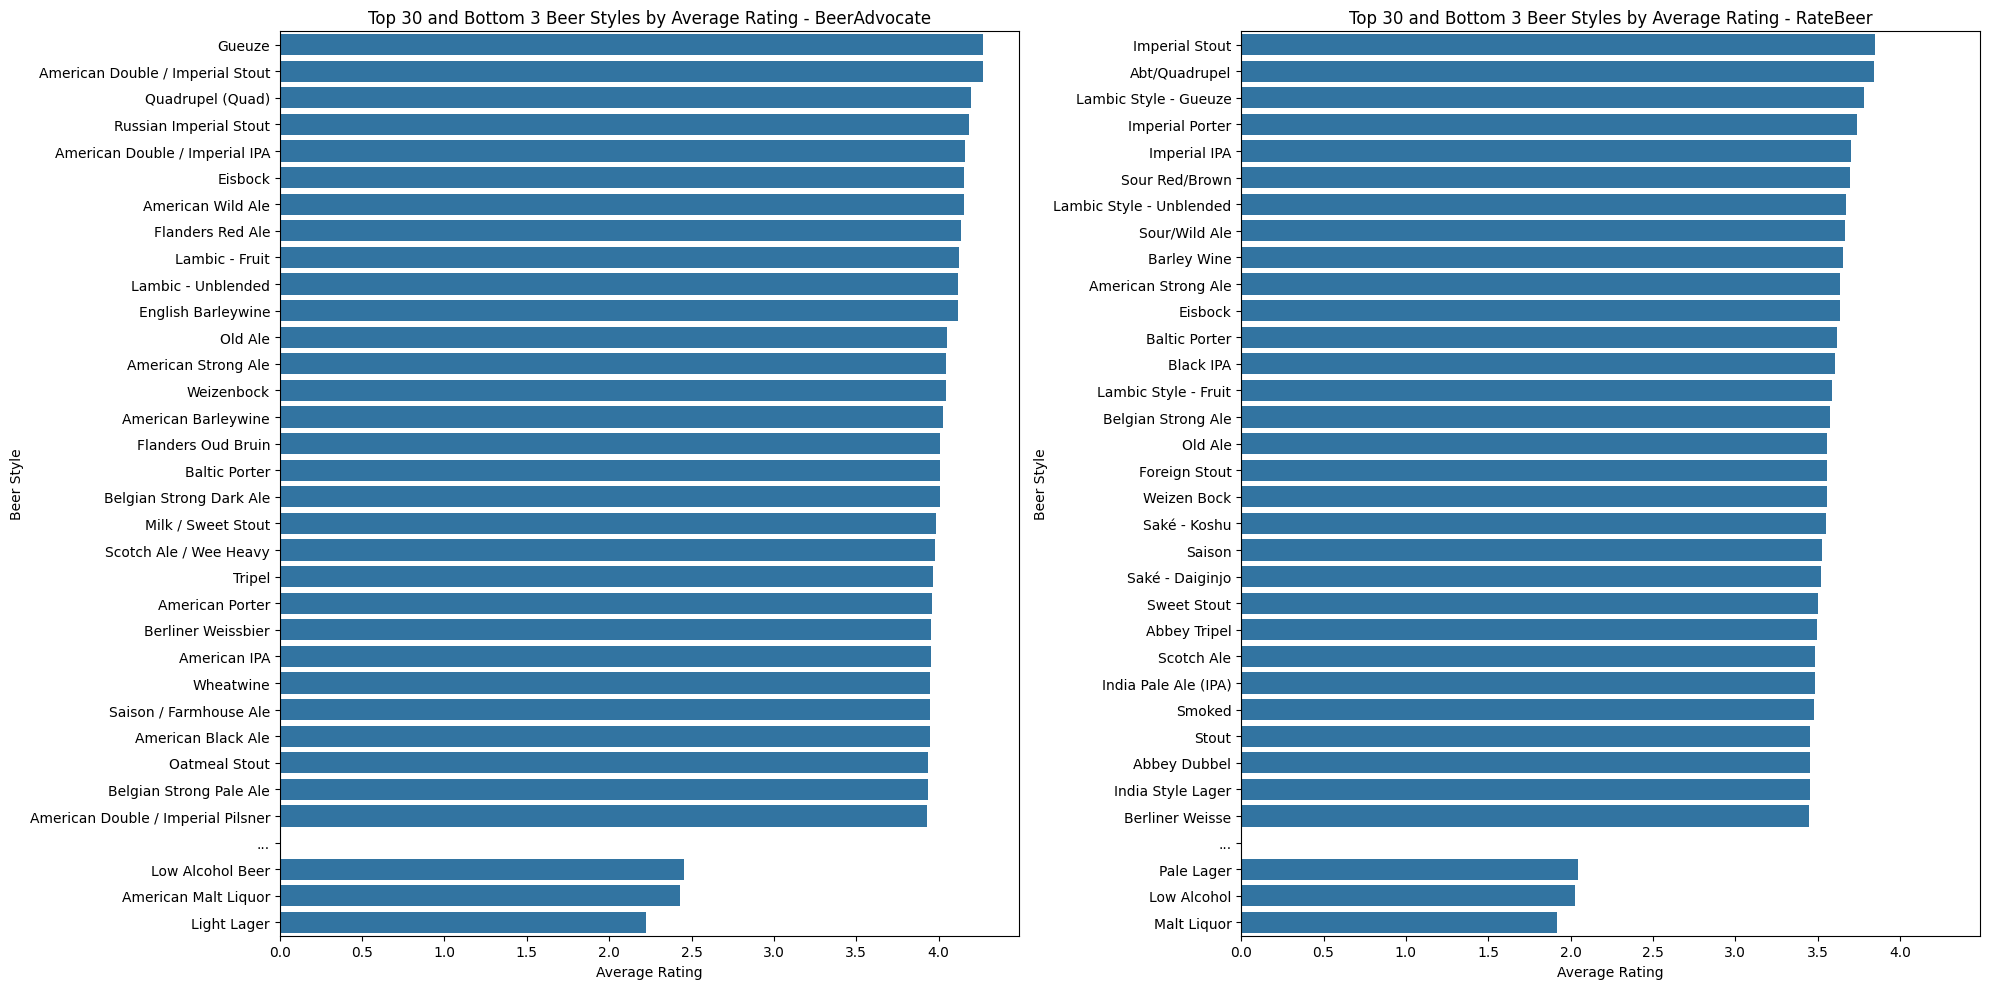

In [101]:
# Calculate average ratings per style
ba_avg_ratings = ba_ratings.groupby('style')['rating'].mean().sort_values()
rb_avg_ratings = rb_ratings.groupby('style')['rating'].mean().sort_values()

# Select top 30 and bottom 3 beer styles
ba_combined_styles = pd.concat([ba_avg_ratings.head(3), pd.Series([np.nan], index=["..."]), ba_avg_ratings.tail(30)])
rb_combined_styles = pd.concat([rb_avg_ratings.head(3), pd.Series([np.nan], index=["..."]), rb_avg_ratings.tail(30)])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)

sns.barplot(x=ba_combined_styles.values, y=ba_combined_styles.index, ax=axes[0])
axes[0].set_title('Top 30 and Bottom 3 Beer Styles by Average Rating - BeerAdvocate')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Beer Style')
axes[0].invert_yaxis() 

sns.barplot(x=rb_combined_styles.values, y=rb_combined_styles.index, ax=axes[1])
axes[1].set_title('Top 30 and Bottom 3 Beer Styles by Average Rating - RateBeer')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Beer Style')
axes[1].invert_yaxis() 

plt.tight_layout()
plt.show()

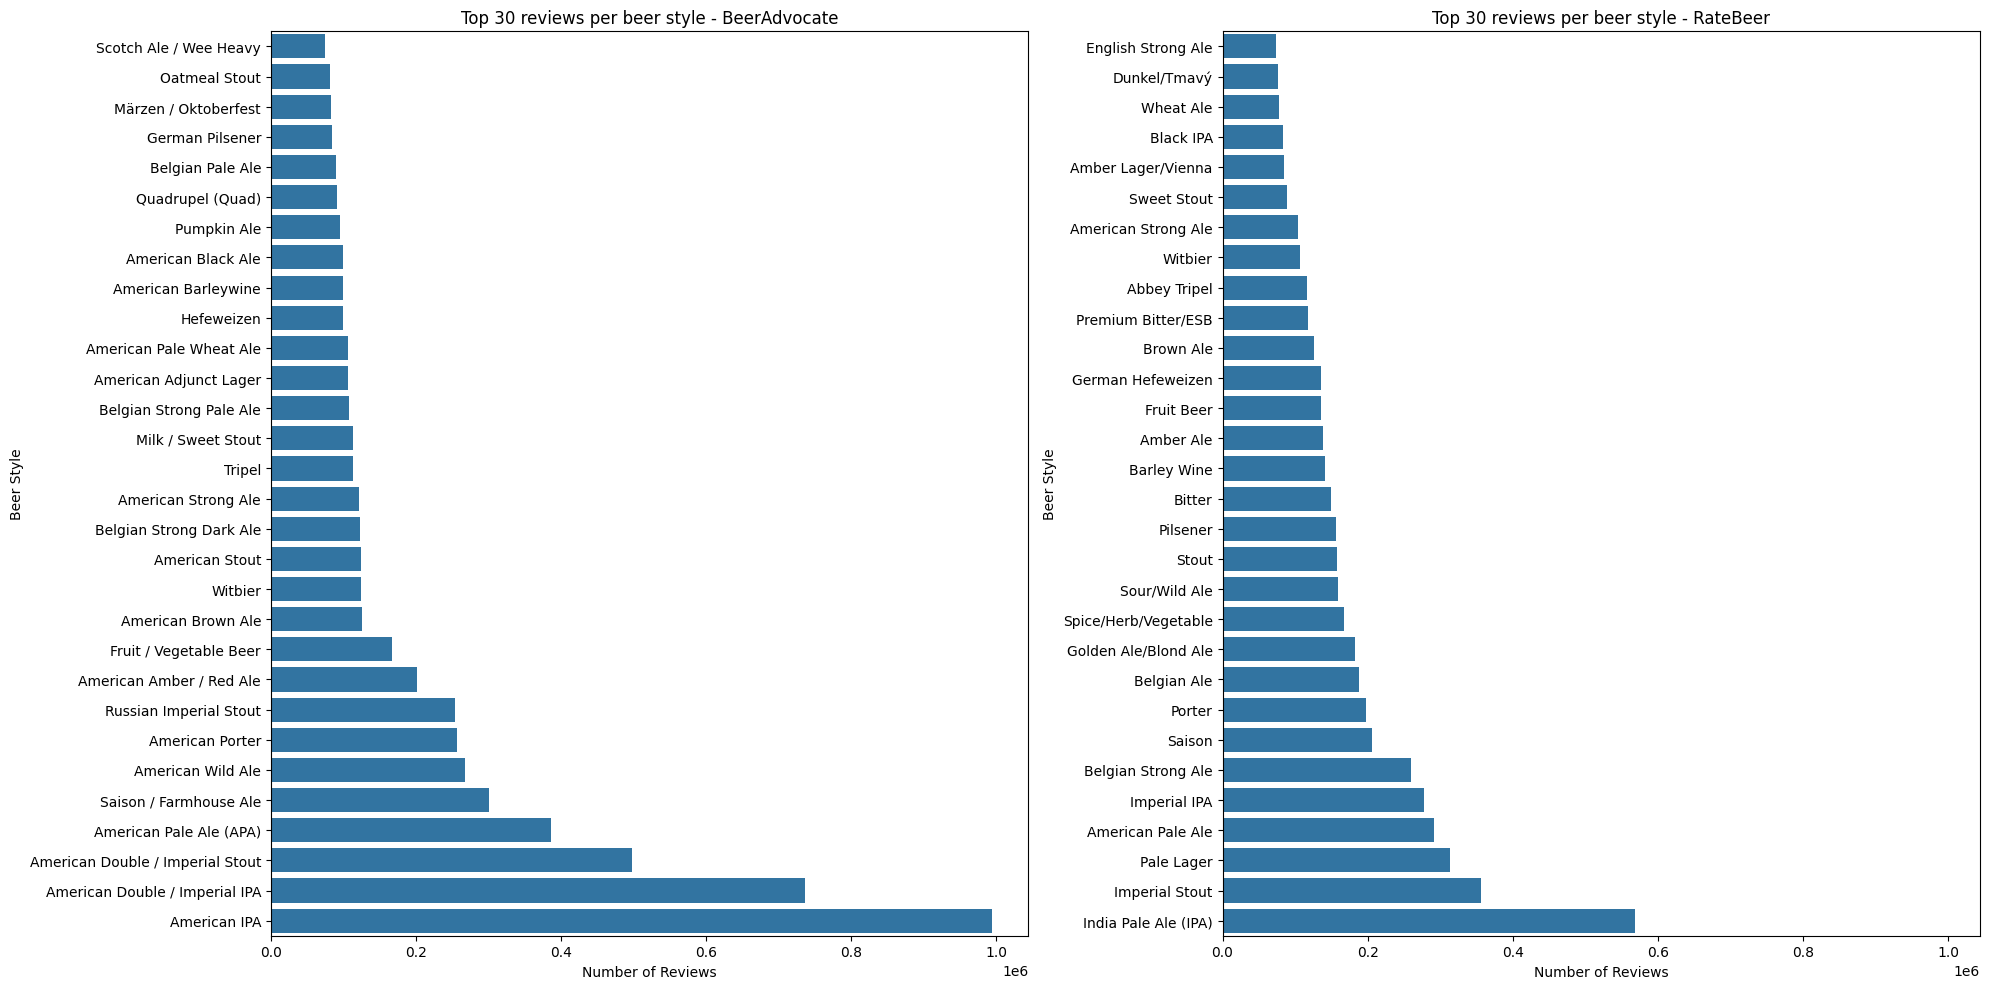

In [102]:
#plot the number of reviews per style
ba_number_of_reviews_per_style = ba_ratings['style'].value_counts().head(30)
rb_number_of_reviews_per_style = rb_ratings['style'].value_counts().head(30)

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)

sns.barplot(x=ba_number_of_reviews_per_style.values, y=ba_number_of_reviews_per_style.index, ax=axes[0])
axes[0].set_title('Top 30 reviews per beer style - BeerAdvocate')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Beer Style')
axes[0].invert_yaxis() 

sns.barplot(x=rb_number_of_reviews_per_style.values, y=rb_number_of_reviews_per_style.index, ax=axes[1])
axes[1].set_title('Top 30 reviews per beer style - RateBeer')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('Beer Style')
axes[1].invert_yaxis() 

plt.tight_layout()
plt.show()

In [103]:
#create a seasonal dataframe by keeping only the month and day
ba_ratings['date'] = pd.to_datetime(ba_ratings['date'])
ba_ratings['month_day'] = ba_ratings['date'].dt.strftime('%m-%d')

rb_ratings['date'] = pd.to_datetime(rb_ratings['date'])
rb_ratings['month_day'] = rb_ratings['date'].dt.strftime('%m-%d')

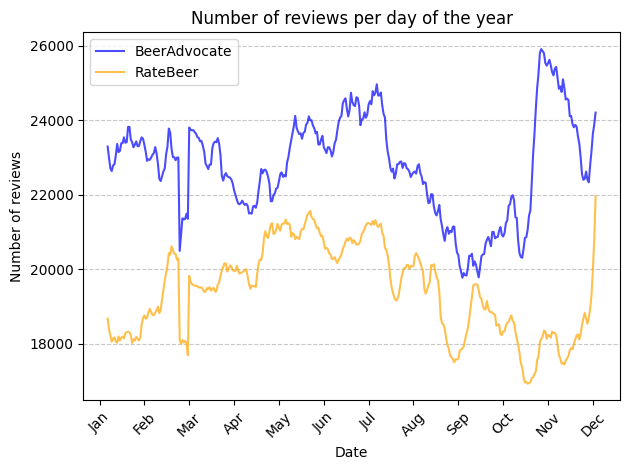

In [104]:
# plot the number of reviews per day of the year with a 7-day moving average
ba_number_of_reviews_per_day = ba_ratings['month_day'].value_counts().sort_index().rolling(window=7).mean() 
rb_number_of_reviews_per_day = rb_ratings['month_day'].value_counts().sort_index().rolling(window=7).mean()

plt.plot(ba_number_of_reviews_per_day, label='BeerAdvocate', color='blue', alpha=0.7)
plt.plot(rb_number_of_reviews_per_day, label='RateBeer', color='orange', alpha=0.7)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(0, len(ba_number_of_reviews_per_day), int(len(ba_number_of_reviews_per_day) / 11)), 
           labels=months)
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Number of reviews per day of the year')
plt.xlabel('Date')
plt.ylabel('Number of reviews')
plt.legend()

plt.tight_layout()
plt.show()

In [105]:
#Look only at the top styles
ba_styles_top = ba_ratings.groupby('style')['rating'].mean().sort_values().tail(5)
rb_styles_top = rb_ratings.groupby('style')['rating'].mean().sort_values().tail(5)


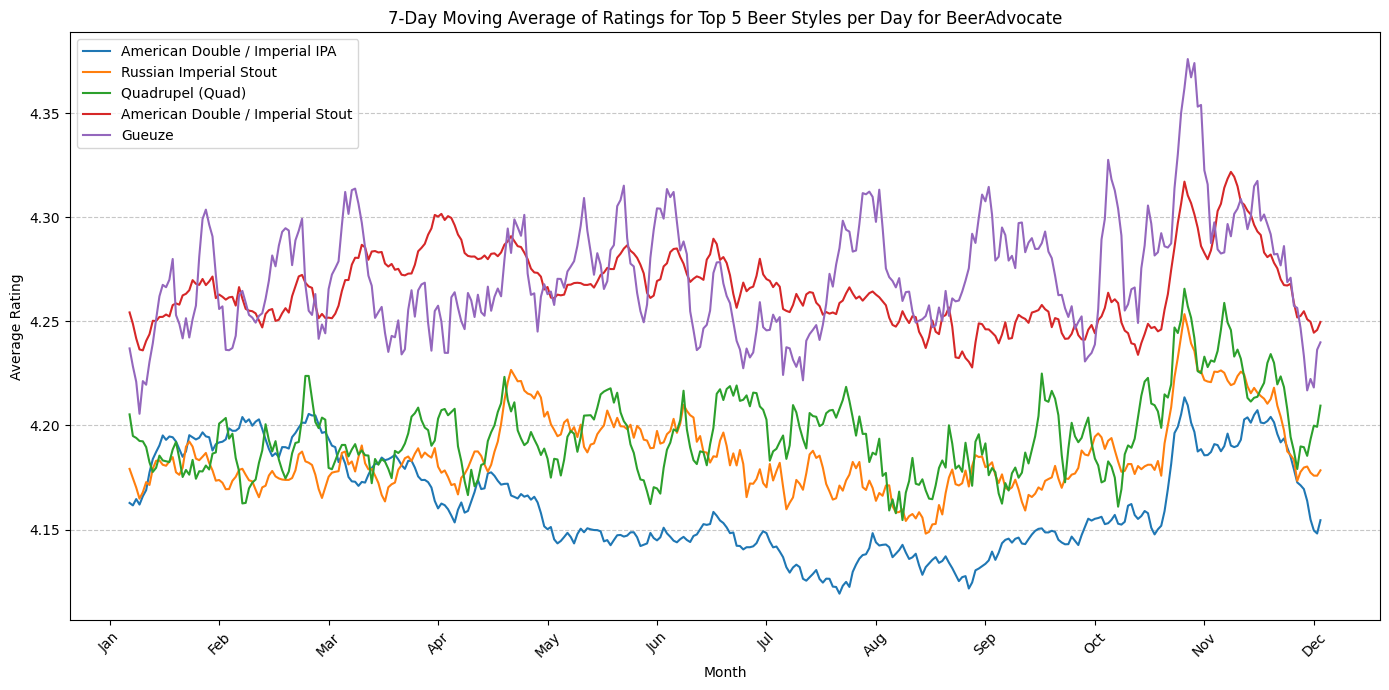

In [106]:
ba_ratings_top = ba_ratings[ba_ratings['style'].isin(ba_styles_top.index)]
ba_average_ratings_per_day = ba_ratings_top.groupby(['style', 'month_day'])['rating'].mean().unstack('style')
ba_rolling_avg_top = ba_average_ratings_per_day.rolling(window=7).mean()

plt.figure(figsize=(14, 7))
for style in ba_styles_top.index:
    plt.plot(ba_rolling_avg_top.index, ba_rolling_avg_top[style], label=style)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(0, len(ba_rolling_avg_top), int(len(ba_rolling_avg_top) / 11)), labels=months)
plt.xticks(rotation=45)

plt.title('7-Day Moving Average of Ratings for Top 5 Beer Styles per Day for BeerAdvocate')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

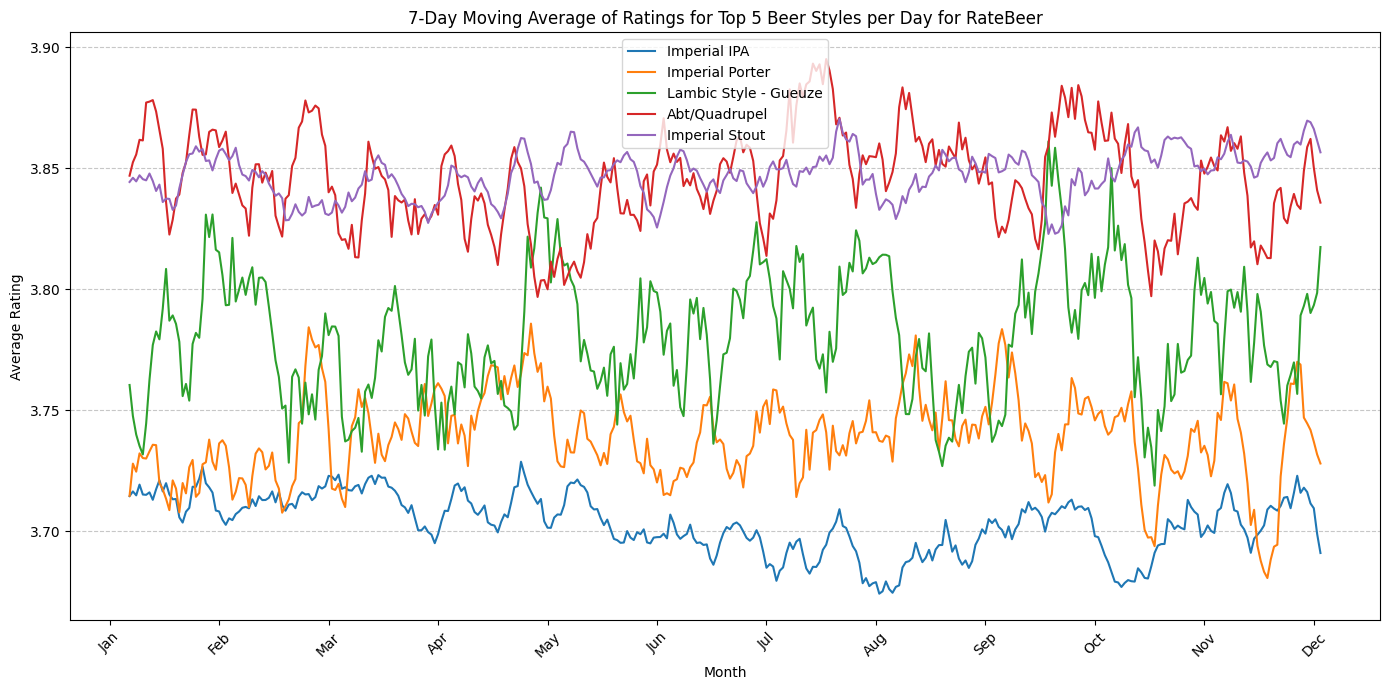

In [107]:
rb_ratings_top = rb_ratings[rb_ratings['style'].isin(rb_styles_top.index)]
rb_average_ratings_per_day = rb_ratings_top.groupby(['style', 'month_day'])['rating'].mean().unstack('style')
rb_rolling_avg_top = rb_average_ratings_per_day.rolling(window=7).mean()

plt.figure(figsize=(14, 7))
for style in rb_styles_top.index:
    plt.plot(rb_rolling_avg_top.index, rb_rolling_avg_top[style], label=style)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(0, len(rb_rolling_avg_top), int(len(rb_rolling_avg_top) / 11)), labels=months)
plt.xticks(rotation=45)

plt.title('7-Day Moving Average of Ratings for Top 5 Beer Styles per Day for RateBeer')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

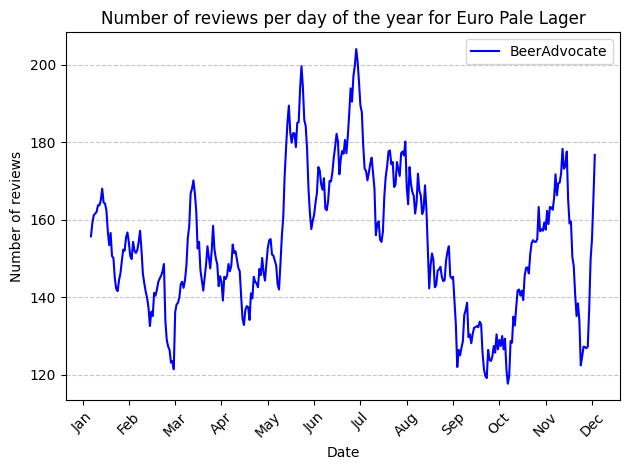

In [108]:
#plot the number of ratings per day of the year for a specific style
style = 'Euro Pale Lager'

ratings_per_day_BA = ba_ratings[ba_ratings['style'] == style].groupby('month_day')['rating'].count()
#7-day moving average
ratings_per_day_BA = ratings_per_day_BA.rolling(window=7).mean()

plt.plot(ratings_per_day_BA, label='BeerAdvocate', color='blue')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(0, len(ratings_per_day_BA), int(len(ratings_per_day_BA) / 11)), labels=months)
plt.xticks(rotation=45)

plt.title(f'Number of reviews per day of the year for {style}')
plt.xlabel('Date')
plt.ylabel('Number of reviews')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()